# Overview 

This notebook describes how to run scFraction in the scverse system. scFraction provides multi-dimensional understanding of gene expression fraction in the accession X celltype format. 

Last update: 12/10/2023, Justin Zhang(justinxuan1230@gmail.com)


## Table of Contents
* [Level1: All_Celltypes_GOI](#All_Celltypes_GOI)
* [Level2: One_Celltype_GOI](#One_Celltype_GOI)
* [All_Celtypes_Delta](#All_Celtypes_Delta)
* [All_Celtypes_One_Gene](#All_Celtypes_One_Gene)


## Preprocessing

In [1]:
import scanpy as sc

adata_path = '/home/lijia/zhangjiaxuan/ALS/ALS+Normal_merged_harmony_seurat_1126.h5ad'
adata = sc.read_h5ad(adata_path)
# adata = sc.read_h5ad('/home/zhang_jiaxuan/ALS/ALS_harmony_0827.h5ad')

In [2]:
import scanpy as sc
ec_adata = sc.read_h5ad('/home/lijia/zhangjiaxuan/ALS/ec_Ast.h5ad')
ec_adata.obs['celltype'] = ec_adata.obs['clusterCellType']
ec_adata.obs['accession'] = ec_adata.obs['orig.ident']

## Accession_Celltype_Adjustment

In [4]:
goi_path = '../ECM_genes.txt'
# Load genes of interest from the text file
with open(goi_path, 'r') as f:
    goi = [line.strip() for line in f]
# make sure you have to accession, experiment, celltype, and disease in your adata

def refine_metanames(meta):
    rename_dict = {
        "orig.ident": "accession",
        "gse_alias": "experiment",
        "DISEASE": "disease",
        "TISSUE": "tissue",
        "celltype": "celltype"
        # "macro_celltype": "celltype"
    }
    
    # Only rename columns that exist in the dataframe and the new name does not exist
    rename_dict = {k: v for k, v in rename_dict.items() if k in meta.columns and v not in meta.columns}
    meta.rename(columns=rename_dict, inplace=True)
    return meta


clean_meta = refine_metanames(ec_adata.obs)
# Check if 'accession' and 'experiment' exist in clean_meta
try:
    assert 'accession' in clean_meta.columns, "'accession' not found in clean_meta columns"
    assert 'experiment' in clean_meta.columns, "'experiment' not found in clean_meta columns"
    assert 'celltype' in clean_meta.columns, "'celltype' not found in clean_meta columns"
    assert 'disease' in clean_meta.columns, "'disease' not found in clean_meta columns"
except AssertionError as e:
    print('Metadata is not fixed, please check your metadata')

clean_meta

Metadata is not fixed, please check your metadata


orig.ident  nCount_originalexp  nFeature_originalexp   
EC2_AAAGCAACAGATTGCT            2               467.0                   413  \
EC2_AAAGCAACAGTCTTCC            2               325.0                   290   
EC2_AACCGCGAGGGATCTG            2               228.0                   205   
EC2_AACTCCCCAGCCAATT            2               244.0                   230   
EC2_AACTCTTAGCGTAGTG            2               228.0                   208   
...                           ...                 ...                   ...   
EC10_TTTGCGCAGCCCAACC           1              1094.0                   832   
EC10_TTTGCGCAGTCATCCA           1               854.0                   615   
EC10_TTTGGTTTCAACCATG           1              5976.0                  2921   
EC10_TTTGTCAAGCCGGTAA           1               447.0                   369   
EC10_TTTGTCAGTAGCTCCG           1               561.0                   489   

                       SampleID PatientID  BrainRegion BraakStage   
EC2_AAAGCAACAGATTGCT          2         1            0          0  \
EC2_AAAGCAACAGTCTTCC          2         1            0          0   
EC2_AACCGCGAGGGATCTG          2         1            0          0   
EC2_AACTCCCCAGCCAATT          2         1            0          0   
EC2_AACTCTTAGCGTAGTG          2         1            0          0   
...                         ...       ...          ...        ...   
EC10_TTTGCGCAGCCCAACC         1         9            0          2   
EC10_TTTGCGCAGTCATCCA         1         9            0          2   
EC10_TTTGGTTTCAACCATG         1         9            0          2   
EC10_TTTGTCAAGCCGGTAA         1         9            0          2   
EC10_TTTGTCAGTAGCTCCG         1         9            0          2   

                       SampleBatch    nUMI  nGene  initialClusterAssignments   
EC2_AAAGCAACAGATTGCT             2   467.0    413                         19  \
EC2_AAAGCAACAGTCTTCC             2   325.0    290                         19   
EC2_AACCGCGAGGGATCTG             2   228.0    205                         19   
EC2_AACTCCCCAGCCAATT             2   244.0    230                         19   
EC2_AACTCTTAGCGTAGTG             2   228.0    208                         19   
...                            ...     ...    ...                        ...   
EC10_TTTGCGCAGCCCAACC            3  1094.0    832                         19   
EC10_TTTGCGCAGTCATCCA            3   854.0    615                         19   
EC10_TTTGGTTTCAACCATG            3  5976.0   2921                         19   
EC10_TTTGTCAAGCCGGTAA            3   447.0    369                         19   
EC10_TTTGTCAGTAGCTCCG            3   561.0    489                         19   

                       seurat.clusters  clusterAssignment clusterCellType   
EC2_AAAGCAACAGATTGCT                 2                  2           Astro  \
EC2_AAAGCAACAGTCTTCC                 2                  2           Astro   
EC2_AACCGCGAGGGATCTG                 2                  2           Astro   
EC2_AACTCCCCAGCCAATT                 2                  2           Astro   
EC2_AACTCTTAGCGTAGTG                 2                  2           Astro   
...                                ...                ...             ...   
EC10_TTTGCGCAGCCCAACC                2                  2           Astro   
EC10_TTTGCGCAGTCATCCA                2                  2           Astro   
EC10_TTTGGTTTCAACCATG                2                  2           Astro   
EC10_TTTGTCAAGCCGGTAA                2                  2           Astro   
EC10_TTTGTCAGTAGCTCCG                2                  2           Astro   

                      leiden celltype  accession  
EC2_AAAGCAACAGATTGCT       3    Astro          2  
EC2_AAAGCAACAGTCTTCC       0    Astro          2  
EC2_AACCGCGAGGGATCTG       0    Astro          2  
EC2_AACTCCCCAGCCAATT       0    Astro          2  
EC2_AACTCTTAGCGTAGTG       0    Astro          2  
...                      ...      ...        ...  
EC

## Calculate Fraction Table

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


def fraction_accCT_table(adata, goi, threshold=0.5):
    # Define a threshold for gene expression
    
    accessions = adata.obs['accession'].unique()
    celltypes = adata.obs['celltype'].unique()

    # Initialize a DataFrame to store the results
    df = pd.DataFrame(index=pd.MultiIndex.from_product([accessions, celltypes], names=['accession', 'celltype']), columns=goi)

    # Calculate the number of cells for each combination of accession and cell type
    num_cells = adata.obs.groupby(['accession', 'celltype']).size()

    # Traverse through all combinations of accession and celltype
    for accession in accessions:
        for celltype in celltypes:
            # Filter the data for the accession and celltype of interest
            adata_filtered = adata[(adata.obs['accession'] == accession) & (adata.obs['celltype'] == celltype)]

            # Filter the data for the genes of interest
            adata_filtered = adata_filtered[:, adata_filtered.var_names.isin(goi)]

            # Calculate the fraction of cells where the gene is expressed
            # Convert the sparse matrix to a dense one before applying np.where
            expressed = np.where(adata_filtered.X.toarray() >= threshold, 1, 0)
            fraction_expressed = np.sum(expressed, axis=0) / adata_filtered.X.shape[0] if adata_filtered.X.shape[0] > 0 else 0

            # Store the fraction expressed in the DataFrame
            df.loc[(accession, celltype)] = fraction_expressed

    # Assume that df is your DataFrame and adata is your AnnData object
    metadata = adata.obs
    metadata = metadata.groupby(['accession', 'celltype']).first()
    # Merge the DataFrame with the metadata
    combined_df = df.merge(metadata, left_index=True, right_index=True)
    # Add the number of cells to the DataFrame
    combined_df = combined_df.merge(num_cells.rename('num_cells'), left_index=True, right_index=True)
    return combined_df

In [5]:
adata.obs = clean_meta
frac_table = fraction_accCT_table(adata, goi=goi)
frac_table

DDR2       DMD DMP1      DSPP       DST   
accession          celltype                                                 
LKTX_190129_01_A01 Sst        0.175066  0.074271  0.0  0.013263       0.0  \
                   L5/6 NP    0.256881  0.137615  0.0   0.06422  0.009174   
                   L5 IT      0.351005  0.137112  0.0  0.010055  0.014625   
                   L2/3 IT    0.560135  0.137931  0.0  0.015139  0.007569   
                   Oligo      0.164384  0.082192  0.0  0.034247       0.0   
...                                ...       ...  ...       ...       ...   
113MCX             Micro-PVM       0.0  0.061728  0.0  0.037037       0.0   
                   Sncg            0.0  0.041667  0.0       0.0       0.0   
                   Endo            0.0  0.165644  0.0  0.153374       0.0   
                   Sst Chodl       0.0       0.0  0.0       0.0       0.0   
                   VLMC            0.0  0.214286  0.0  0.083333       0.0   

                                EFEMP1    EFEMP2     ELANE       ELN   
accession          celltype                                            
LKTX_190129_01_A01 Sst         0.29443  0.039788  0.002653  0.002653  \
                   L5/6 NP    0.330275  0.229358  0.009174       0.0   
                   L5 IT      0.183729  0.555759  0.002742  0.006399   
                   L2/3 IT    0.429773  0.458368  0.005046  0.009251   
                   Oligo      0.047945  0.452055       0.0  0.561644   
...                                ...       ...       ...       ...   
113MCX             Micro-PVM   0.08642       0.0  0.012346  0.037037   
                   Sncg       0.041667  0.166667       0.0       0.0   
                   Endo        0.07362  0.006135       0.0       0.0   
                   Sst Chodl       0.0       0.0       0.0       0.0   
                   VLMC       0.095238   0.02381   0.02381       0.0   

                                  F11R  ...         DGE_group   
accession          celltype             ...                     
LKTX_190129_01_A01 Sst        0.137931  ...               NaN  \
                   L5/6 NP    0.293578  ...               NaN   
                   L5 IT      0.333638  ...               NaN   
                   L2/3 IT    0.318755  ...               NaN   
                   Oligo      0.027397  ...               NaN   
...                                ...  ...               ...   
113MCX             Micro-PVM  0.024691  ...         Microglia   
                   Sncg            0.0  ...  In.5HT3aR_VIPneg   
                   Endo       0.030675  ...        Fibroblast   
                   Sst Chodl       0.0  ...               OPC   
                   VLMC       0.011905  ...        Fibroblast   

                                 orig.celltype percent.mt log10GenesPerUMI   
accession          celltype                                                  
LKTX_190129_01_A01 Sst                     NaN   0.000000         0.885614  \
                   L5/6 NP                 NaN   0.000000         0.892289   
                   L5 IT                   NaN   0.000000         0.884835   
                   L2/3 IT                 NaN   0.000000         0.925486   
                   Oligo                   NaN   0.000000         0.914319   
...                                        ...        ...              ...   
113MCX             Micro-PVM         Microglia   2.715356         0.960526   
                   Sncg       In.5HT3aR_VIPneg   1.161616         0.881681   
                   Endo             Fibroblast   8.667335         0.945483   
                   Sst Chodl               OPC   0.306748         0.958109   
                   VLMC             Fibroblast   1.161996         0.940443   

                                      experiment gender region          class   
accession          celltype                                                     
LKTX_190129_01_A01 Sst        human_10x_m1_brain      F     M1      GABA

In [6]:
frac_table = fraction_accCT_table(ec_adata, goi=goi)
frac_table

DDR2       DMD DMP1      DSPP       DST    EFEMP1   
accession celltype                                                          
2         Astro     0.062857  0.014286  0.0  0.002857  0.002857  0.117143  \
0         Astro      0.07078  0.012704  0.0  0.009074  0.001815  0.117967   
3         Astro     0.064516  0.032258  0.0       0.0       0.0  0.032258   
4         Astro     0.107784   0.01497  0.0  0.008982       0.0  0.098802   
6         Astro     0.123967  0.157025  0.0  0.057851       0.0  0.132231   
7         Astro     0.121563  0.075253  0.0  0.041968       0.0  0.079595   
5         Astro     0.045198  0.079096  0.0  0.008475       0.0  0.115819   
9         Astro     0.016908  0.019324  0.0  0.009058  0.002415  0.023551   
8         Astro     0.026531  0.023469  0.0  0.020408  0.003061  0.040816   
1         Astro     0.100386   0.06435  0.0  0.028314       0.0  0.032175   

                      EFEMP2     ELANE       ELN      F11R  ... BraakStage   
accession celltype                                          ...              
2         Astro         0.12       0.0  0.014286  0.017143  ...          0  \
0         Astro      0.07441  0.005445  0.016334  0.019964  ...          0   
3         Astro     0.064516       0.0       0.0       0.0  ...          0   
4         Astro     0.092814       0.0  0.017964  0.008982  ...          1   
6         Astro     0.396694  0.008264  0.057851  0.041322  ...          1   
7         Astro     0.344428  0.013025  0.081042  0.031838  ...          1   
5         Astro     0.124294  0.002825  0.031073   0.00565  ...          1   
9         Astro     0.091787  0.004227  0.023551    0.0157  ...          2   
8         Astro     0.156122   0.00102  0.046939  0.027551  ...          2   
1         Astro     0.230373  0.005148  0.057915  0.019305  ...          2   

                   SampleBatch    nUMI nGene initialClusterAssignments   
accession celltype                                                       
2         Astro              2   467.0   413                        19  \
0         Astro              2   430.0   362                        19   
3         Astro              2   206.0   172                        19   
4         Astro              2   300.0   258                        19   
6         Astro              3  1308.0   908                        19   
7         Astro              3  6194.0  2929                        19   
5         Astro              1  1449.0   853                        15   
9         Astro              1   849.0   579                         5   
8         Astro              1  1521.0  1043                         9   
1         Astro              3  4014.0  2122                        19   

                   seurat.clusters clusterAssignment clusterCellType leiden   
accession celltype                                                            
2         Astro                  2                 2           Astro      3  \
0         Astro                  2                 2           Astro      5   
3         Astro                  2                 2           Astro      0   
4         Astro                  2                 2           Astro      0   
6         Astro                  2                 2           Astro      3   
7         Astro                  2                 2           Astro      2   
5         Astro                  2                 2           Astro      3   
9         Astro                  2                 2           Astro      1   
8         Astro                  2                 2           Astro      1   
1         Astro                  2                 2           Astro      5   

                   num_cells  
accession celltype            
2         Astro          350  
0         Astro          551  
3         Astro           93  
4         Astro          334  
6         Astro          121  
7         Astro          691  
5         Astro          354  
9         Astro         1656  
8         Astr

In [9]:
def gene_ct_fraction_plot(combined_df, goi, groupby='celltype', x_padding=1.5, y_padding=0.8):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    ct_len = len(combined_df.index.unique('celltype'))
    df_exp_cell = combined_df[goi].multiply(combined_df['num_cells'], axis=0)
    # df_exp_cell = df_exp_cell / (df_exp_cell.max() + 1e-10)
    # Create a new DataFrame to store the results
    # index = pd.MultiIndex.from_product([goi, ['mean_expression', 'fraction_expressing']])
    # # Create a new DataFrame with the multi-index
    # result = pd.DataFrame(columns=index)

    # # Calculate the mean expression and fraction of cells expressing each gene
    # for gene in goi:
    #     # Calculate the mean expression of the gene in each group
    #     mean_fraction = combined_df.groupby(groupby)[gene].mean()
    #     # Calculate the fraction of cells expressing the gene in each group
    #     mean_exp_cellNum = df_exp_cell.groupby(groupby)[gene].mean()
    #     # Store the results in the DataFrame
    #     result[(gene, 'mean_fraction')] = mean_fraction
    #     result[(gene, 'mean_exp_cellNum')] = mean_exp_cellNum

    if len(goi) >= 100:
        fig_width = len(goi) // 5
    else:
        fig_width = 14

    # Create a figure
    fig, ax = plt.subplots(figsize=(fig_width, 1.2*ct_len))

    # Assuming 'result' is your DataFrame containing 'mean_expression' and 'fraction_expressing' for each gene
    for gene in goi:
        mean_fraction = combined_df.groupby(groupby, observed=True)[gene].mean().fillna(0)
        # Calculate the fraction of cells expressing the gene in each group
        mean_exp_cellNum = df_exp_cell.groupby(groupby, observed=True)[gene].mean().fillna(0)
       
        # print(mean_fraction)
        # mean_exp_cellNum = result[(gene, 'mean_exp_cellNum')] / (result[(gene, 'mean_exp_cellNum')].max() + 1e-10)
        
        # print(mean_exp_cellNum)
        # # Replace any NaN values with 0
        # mean_fraction = mean_fraction
        # mean_exp_cellNum = mean_exp_cellNum.fillna(0)

        # The size and color of the dots are determined by the mean expression and fraction of cells expressing the gene
        # scatter = ax.scatter([gene]*len(mean_fraction), np.arange(len(mean_fraction)), s=mean_fraction*100, c=mean_exp_cellNum, cmap='Reds', vmin=0, vmax=1)
        scatter = ax.scatter([gene]*len(mean_fraction), np.arange(len(mean_fraction)), s=mean_exp_cellNum, c=mean_fraction, cmap='Reds', vmin=0, vmax=0.5)
        
    ax.set_yticks(np.arange(len(mean_fraction)))  # Set y-ticks to be the cell types
    ax.set_yticklabels(mean_fraction.index, fontsize=12)  # Set y-tick labels to be the cell types
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9) # Set x-tick labels to be goi
    ax.invert_yaxis()  # Invert y-axis

    # Set the x and y axis limits
    ax.set_xlim(-1.5, len(goi) + x_padding)
    ax.set_ylim(-1.5 + y_padding, len(mean_fraction))

    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="1%", pad=0.05)
    # ax.set_title(f'Mean Gene Expression Fraction for {disease_of_interest}, Expression Threshold: {threshold}')
    plt.colorbar(scatter, label='Mean Fraction', ax=ax, cax=cax, location = 'right')
    plt.show()
    return plt

/tmp/ipykernel_32495/467140756.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9) # Set x-tick labels to be goi


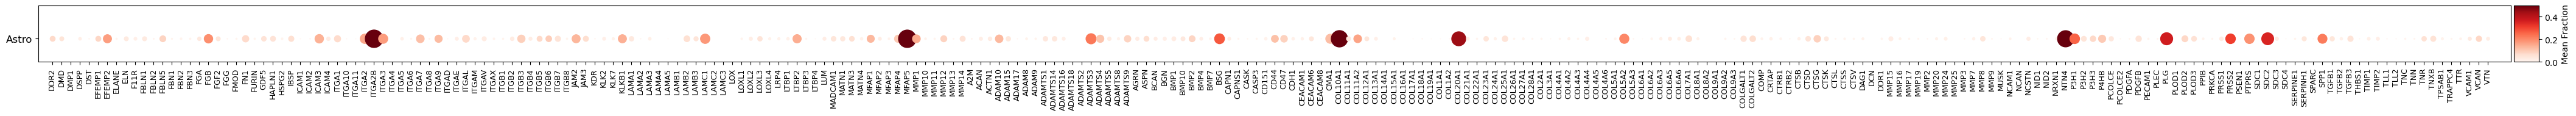

<module 'matplotlib.pyplot' from '/home/lijia/zhangjiaxuan/.conda/envs/BPCells/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [10]:
gene_ct_fraction_plot(frac_table, goi)

### All the downstream modules depend on this frac_table, so make sure the frac_table is calculating the correct fraction here

In [14]:
frac_table['disease'] = 'Astro'

# One_Celltype_GOI

In [18]:
import seaborn as sns

def fraction_difference_dotplot(combined_df, goi, celltype_of_interest='Astro'):

    df_mean = combined_df[goi].apply(pd.to_numeric, errors='coerce').fillna(0).groupby(level='celltype').mean()

    # df_diff = df_mean1 - df_mean2

    # Calculate the fraction of cells expressing each gene
    df_fraction = df_mean.groupby(level='celltype').mean()

    # Adjust the scale of the fractions
    df_fraction_scaled = abs(df_fraction) * 250  # Scale by a constant

    global_min = df_mean.quantile(0.01).min()
    global_max = df_mean.quantile(0.99).max()
    print(global_min, global_max)

    if len(goi) >= 100:
        fig_width = len(goi) // 10
    else:
        fig_width = 14

    fig, ax = plt.subplots(figsize=(fig_width, 6))

    for i in range(df_mean.shape[1]):
        ax.scatter(np.repeat(i, df_mean.shape[0]), df_mean.iloc[:, i], s=df_fraction_scaled.iloc[:, i], color='b', alpha=0.2)
        ax.scatter(i, df_mean.iloc[:, i].mean(), s=df_fraction_scaled.iloc[:, i].mean(), color='b')


    ax.set_ylabel('Difference in Mean Gene Expression')
    ax.set_xlabel('Gene Name')
    # ax.set_title(f'Mean Gene Expression Fraction Difference between {diseases[0]} and {diseases[1]}')
    ax.set_xticks(range(df_mean.shape[1]))
    ax.set_xticklabels(df_mean.columns, rotation=90, fontsize=6)
    plt.tight_layout()
    plt.show()
    return plt


0.0 0.6857802236441196


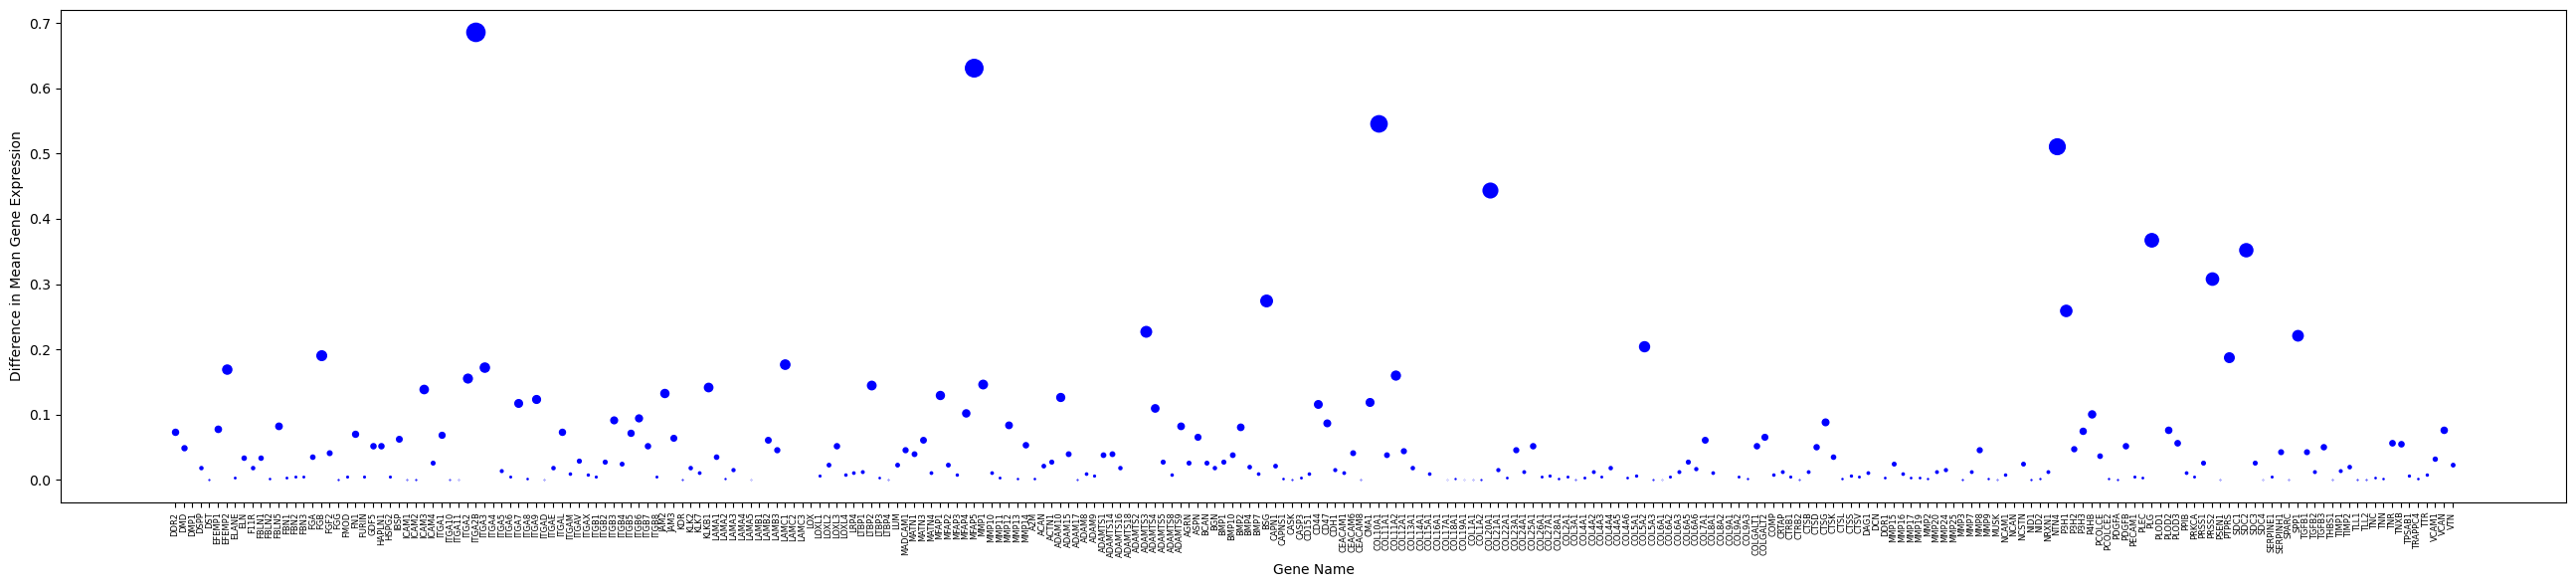

<module 'matplotlib.pyplot' from '/home/lijia/zhangjiaxuan/.conda/envs/BPCells/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [19]:
fraction_difference_dotplot(frac_table, goi, celltype_of_interest='Astro')

# delta_single_ct_fraction

In [ ]:
def gene_ct_fraction_delta(combined_df, goi, groupby='celltype', x_padding=1.5, y_padding=0.8):
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    diseases = combined_df[combined_df['disease'].notna()]['disease'].unique()
    ct_len = len(combined_df.index.unique('celltype'))
    df_exp_cell = combined_df[goi].multiply(combined_df['num_cells'], axis=0)

    if len(goi) >= 100:
        fig_width = len(goi) // 5
    else:
        fig_width = 14

    df_disease1 = combined_df[combined_df['disease'] == diseases[0]]
    d1_exp_cell = df_disease1[goi].multiply(df_disease1['num_cells'], axis=0)
    df_disease2 = combined_df[combined_df['disease'] == diseases[1]]
    d2_exp_cell = df_disease2[goi].multiply(df_disease2['num_cells'], axis=0)
    # Calculate the mean expression for each cell type
    df_mean1 = df_disease1[goi].apply(pd.to_numeric, errors='coerce').fillna(0).groupby(level='celltype', observed=True).mean()
    df_mean2 = df_disease2[goi].apply(pd.to_numeric, errors='coerce').fillna(0).groupby(level='celltype', observed=True).mean()
    df_diff = df_mean1 / (df_mean2 + 0.0001)

    exp_mean1 = d1_exp_cell[goi].apply(pd.to_numeric, errors='coerce').fillna(0).groupby(level='celltype', observed=True).mean()
    exp_mean2 = d2_exp_cell[goi].apply(pd.to_numeric, errors='coerce').fillna(0).groupby(level='celltype', observed=True).mean()
    exp_diff = exp_mean1 / (exp_mean2 + 0.0001) * 500

    # Create a figure
    fig, ax = plt.subplots(figsize=(fig_width, 1.2*ct_len))

    # Assuming 'result' is your DataFrame containing 'mean_expression' and 'fraction_expressing' for each gene
    for gene in goi:
        # Calculate the difference in mean expression
        mean_fraction = df_diff[gene]
        # Calculate the fraction of cells expressing the gene in each group
        mean_exp_cellNum = exp_diff[gene]

        scatter = ax.scatter([gene]*len(mean_fraction), np.arange(len(mean_fraction)), s=mean_exp_cellNum, c=mean_fraction, cmap='Reds', vmin=0, vmax=0.8)
        
    ax.set_yticks(np.arange(len(mean_fraction)))  # Set y-ticks to be the cell types
    ax.set_yticklabels(mean_fraction.index, fontsize=12)  # Set y-tick labels to be the cell types
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9) # Set x-tick labels to be goi
    ax.invert_yaxis()  # Invert y-axis

    # Set the x and y axis limits
    ax.set_xlim(-1.5, len(goi) + x_padding)
    ax.set_ylim(-1.5 + y_padding, len(mean_fraction))

    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="1%", pad=0.05)
    # ax.set_title(f'Mean Gene Expression Fraction for {disease_of_interest}, Expression Threshold: {threshold}')
    plt.colorbar(scatter, label='Mean Fraction', ax=ax, cax=cax, location = 'right')
    plt.show()
    return plt

## All_Celltypes_GOI

In [23]:
import scanpy as sc
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

def refine_metanames(meta):
    meta.rename(columns={
        "orig.ident": "accession",
        "gse_alias": "experiment",
        "DISEASE": "disease",
        "TISSUE": "tissue",
        "celltype": "celltype"
        # "macro_celltype": "celltype"
    }, inplace=True)
    return meta

def clean_metanoise(meta):
    meta = refine_metanames(meta)
    meta_param = ["disease", "tissue", "experiment", "celltype", "groups", "accession"]
    meta = meta[meta_param]
    meta.replace(["", "NA", None], "unknown", inplace=True)
    return meta


def fraction_param_table(adata, threshold=0.5, param='param', goi='SCGB1A1'):
    # preprocess meta data names
    adata.obs['param'] = adata.obs[param]
    meta = adata.obs
    meta_param = ["disease", "tissue", "experiment", "celltype", "groups", "accession", 'param']
    frac_meta = meta.loc[:, meta.columns.intersection(meta_param)].drop_duplicates(subset=['accession', param])
    frac_meta['idx'] = frac_meta[param].astype(str) + frac_meta['accession'].astype(str)

    df = adata[:, goi].to_df()
    df['accession'] = adata.obs['accession']
    df['param'] = adata.obs['param']
    df['disease'] = adata.obs['disease']
    # Create a DataFrame for 'acc_table'
    acc_table = df.groupby(['accession', 'param']).size().reset_index(name='Freq')
    acc_table['idx'] = acc_table['param'].astype(str) + acc_table['accession'].astype(str)
    acc_table = acc_table[acc_table['Freq'] > 0]

    frac_meta = pd.DataFrame()
    frac_meta['idx'] = df['param'].astype(str) + df['accession'].astype(str)
    frac_meta['disease'] = df['disease']
    # Merge frac_meta and acc_table on 'idx'
    frac_meta = pd.merge(frac_meta, acc_table, how='left', left_on='idx', right_on='idx')
    # Fill NaN values with 0
    frac_meta['Freq'] = frac_meta['Freq'].fillna(0)
    # Rename 'Freq' to 'cell_counts'
    frac_meta.rename(columns={'Freq': 'cell_counts'}, inplace=True)
    cluster_frac = []
    # Every gene expressed counts
    for i in range(len(goi)):
        # current gene cluster-wise expression
        tmp = df.iloc[:, i]
        exp_cells = df[tmp >= threshold]
        
        # Create a DataFrame for 'exp_table'
        exp_table = exp_cells.groupby(['accession', 'param']).size().reset_index(name='Freq')
        exp_table = exp_table[exp_table['Freq'] > 0]
        goi_frac = frac_meta.copy()
        goi_frac['gene'] = goi[i]
        goi_frac['expressed_counts'] = 0
        goi_frac[param] = goi_frac['param']
        goi_frac.loc[exp_table.index, 'expressed_counts'] = exp_table['Freq'].values
        goi_frac['expressed_ratio'] = goi_frac['expressed_counts'] / goi_frac['cell_counts']
        cluster_frac.append(goi_frac)

    frac_table = pd.concat(cluster_frac)
    frac_table.drop(columns=['idx'], inplace=True)
    return frac_table

def fraction_plot(frac_table, goi='SCGB1A1', threshold=0.5, param='disease', floor=50):
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Assuming 'frac_table' is your DataFrame and 'goi' is your list of genes of interest
    frac_table['param'] = frac_table[param]
    sample_names = frac_table['param'].unique()

    ps = []

    for gene in goi:
        cur_frac = frac_table[frac_table['gene'] == gene]
        all_sample_table = [len(cur_frac['accession'][cur_frac['param'] == sample].unique()) for sample in sample_names]
        cur_frac = cur_frac[(cur_frac['cell_counts'] >= floor) & (cur_frac['expressed_ratio'] > 0)]
        
        if cur_frac.empty:
            print(f"Current gene: {gene} is not found in Fraction Table")
            continue
        
        cur_frac['param_ct'] = cur_frac['celltype'].astype(str) + "_" + cur_frac['param'].astype(str)
        sample_table = [len(cur_frac['accession'][cur_frac['param'] == sample].unique()) for sample in sample_names]
        
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='param_ct', y='expressed_ratio', data=cur_frac, hue='param')
        sns.swarmplot(x='param_ct', y='expressed_ratio', data=cur_frac, color=".25")
        
        title = f"Fraction plot of GOI: {gene}"
        subtitle = (
            f"Total {sample_names[0]} Sample Number: {all_sample_table[0]}\n"
            f"Total {sample_names[0]} Sample Number Pass Cutoff: {sample_table[0]}\n"
            f"Total {sample_names[1]} Sample Number: {all_sample_table[1]}\n"
            f"Total {sample_names[1]} Sample Number Pass Cutoff: {sample_table[1]}\n"
            f"Total Cell Counts: {frac_table['cell_counts'].nunique()}\n"
            f"Pass Cutoff Cell Counts: {round(sum(cur_frac['cell_counts'] * cur_frac['expressed_ratio']))}\n"
            f"Expression Cutoff: {threshold}\n"
            f"Minimum Cell Number: {floor}"
        )
        
        plt.title(title, y=1.5, loc='left')  # Align the title to the left
        plt.text(x=0, y=1.5, s=subtitle, ha='left', va='top', transform=plt.gca().transAxes)  # Add the subtitle using plt.text()
        plt.xlabel('Genes of Interest')
        plt.ylabel('Fraction of Cells Expressing Target Genes')
        plt.xticks(rotation=45)
        
        plt.ylim(0, cur_frac['expressed_ratio'].mean() + 1)  # Adjust 0.1 to provide some padding
        # Append the current figure to the list

        # Adjust the top margin
        plt.subplots_adjust(top=0.6)
        ps.append(plt.gcf())

    # Display all plots
    for fig in ps:
        fig.show()





In [58]:
param = 'disease'
# Define a threshold for gene expression
threshold = 0.5

accessions = adata.obs['accession'].unique()
celltypes = adata.obs['celltype'].unique()

# Initialize a DataFrame to store the results
df = pd.DataFrame(index=pd.MultiIndex.from_product([accessions, celltypes], names=['accession', 'celltype']), columns=selected_genes)

# Traverse through all combinations of accession and celltype
for accession in accessions:
    for celltype in celltypes:
        # Filter the data for the accession and celltype of interest
        adata_filtered = adata[(adata.obs['accession'] == accession) & (adata.obs['celltype'] == celltype)]

        # Filter the data for the genes of interest
        adata_filtered = adata_filtered[:, adata_filtered.var_names.isin(selected_genes)]

        # Calculate the fraction of cells where the gene is expressed
        # Convert the sparse matrix to a dense one before applying np.where
        expressed = np.where(adata_filtered.X.toarray() >= threshold, 1, 0)
        fraction_expressed = np.sum(expressed, axis=0) / adata_filtered.X.shape[0] if adata_filtered.X.shape[0] > 0 else 0

        # Store the fraction expressed in the DataFrame
        df.loc[(accession, celltype)] = fraction_expressed


In [355]:
def fraction_accCT_table(adata, goi):
    # Define a threshold for gene expression
    threshold = 0.5

    accessions = adata.obs['accession'].unique()
    celltypes = adata.obs['celltype'].unique()

    # Initialize a DataFrame to store the results
    df = pd.DataFrame(index=pd.MultiIndex.from_product([accessions, celltypes], names=['accession', 'celltype']), columns=goi)

    # Calculate the number of cells for each combination of accession and cell type
    num_cells = adata.obs.groupby(['accession', 'celltype']).size()

    # Traverse through all combinations of accession and celltype
    for accession in accessions:
        for celltype in celltypes:
            # Filter the data for the accession and celltype of interest
            adata_filtered = adata[(adata.obs['accession'] == accession) & (adata.obs['celltype'] == celltype)]

            # Filter the data for the genes of interest
            adata_filtered = adata_filtered[:, adata_filtered.var_names.isin(goi)]

            # Calculate the fraction of cells where the gene is expressed
            # Convert the sparse matrix to a dense one before applying np.where
            expressed = np.where(adata_filtered.X.toarray() >= threshold, 1, 0)
            fraction_expressed = np.sum(expressed, axis=0) / adata_filtered.X.shape[0] if adata_filtered.X.shape[0] > 0 else 0

            # Store the fraction expressed in the DataFrame
            df.loc[(accession, celltype)] = fraction_expressed

    # Assume that df is your DataFrame and adata is your AnnData object
    metadata = adata.obs
    metadata = metadata.groupby(['accession', 'celltype']).first()
    # Merge the DataFrame with the metadata
    combined_df = df.merge(metadata, left_index=True, right_index=True)
    # Add the number of cells to the DataFrame
    combined_df = combined_df.merge(num_cells.rename('num_cells'), left_index=True, right_index=True)

    return combined_df


In [1]:
ec_adata = sc.read_h5ad('/home/lijia/zhangjiaxuan/ALS/ec_Ast.h5ad')
ec_adata.obs['celltype'] = ec_adata.obs['clusterCellType']
ec_adata.obs['accession'] = ec_adata.obs['orig.ident']

NameError: name 'sc' is not defined

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_dot_plot(df):
    # Calculate the mean of cells actually expressing the genes
    mean_cells = df.mean(axis=0)

    # Create a figure
    fig, ax = plt.subplots(figsize=(10, 10))

    # Loop over the DataFrame rows
    for i in range(df.shape[0]):
        # Create a scatter plot for each row
        # The size of the dots is determined by the mean of cells actually expressing the genes
        # The color scale is determined by the fraction values
        sc = ax.scatter(df.columns, [df.index[i]]*len(df.columns), s=mean_cells*100, c=df.iloc[i, :], cmap='viridis')

    # Add a colorbar
    plt.colorbar(sc)

    ax.set_xlabel('Gene')
    ax.set_ylabel('Accession')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.tight_layout()
    plt.show()

# Call the function
draw_dot_plot(combined_df)


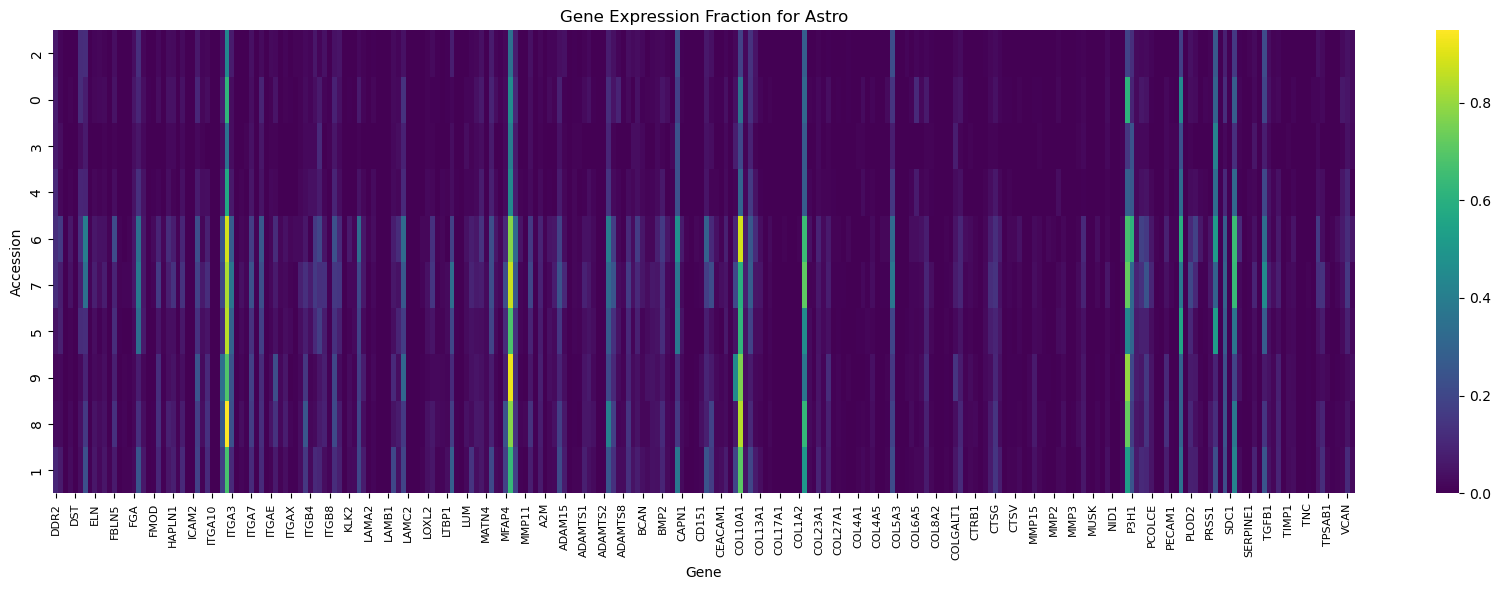

<module 'matplotlib.pyplot' from '/home/lijia/zhangjiaxuan/.conda/envs/BPCells/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [279]:
fraction_per_disease(combined_df=ec_df, goi=goi, celltype_of_interest='Astro')

In [281]:
sfg_adata = sc.read_h5ad('/home/lijia/zhangjiaxuan/ALS/sfg_Ast.h5ad')
sfg_adata

AnnData object with n_obs × n_vars = 7099 × 33694
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'SampleID', 'PatientID', 'BrainRegion', 'BraakStage', 'SampleBatch', 'nUMI', 'nGene', 'initialClusterAssignments', 'seurat.clusters', 'clusterAssignment', 'clusterCellType', 'leiden'
    var: 'features'
    uns: 'PatientID_colors', 'dendrogram_leiden', 'draw_graph', 'leiden', 'leiden_colors', 'neighbors', 'rank_genes_groups', 'umap'
    obsm: 'X_CCA', 'X_CCA.ALIGNED', 'X_TSNE', 'X_draw_graph_fa', 'X_pca', 'X_pca_harmony', 'X_umap'
    obsp: 'connectivities', 'distances'

In [283]:
sfg_adata.obs['celltype'] = sfg_adata.obs['clusterCellType']
sfg_adata.obs['accession'] = sfg_adata.obs['orig.ident']

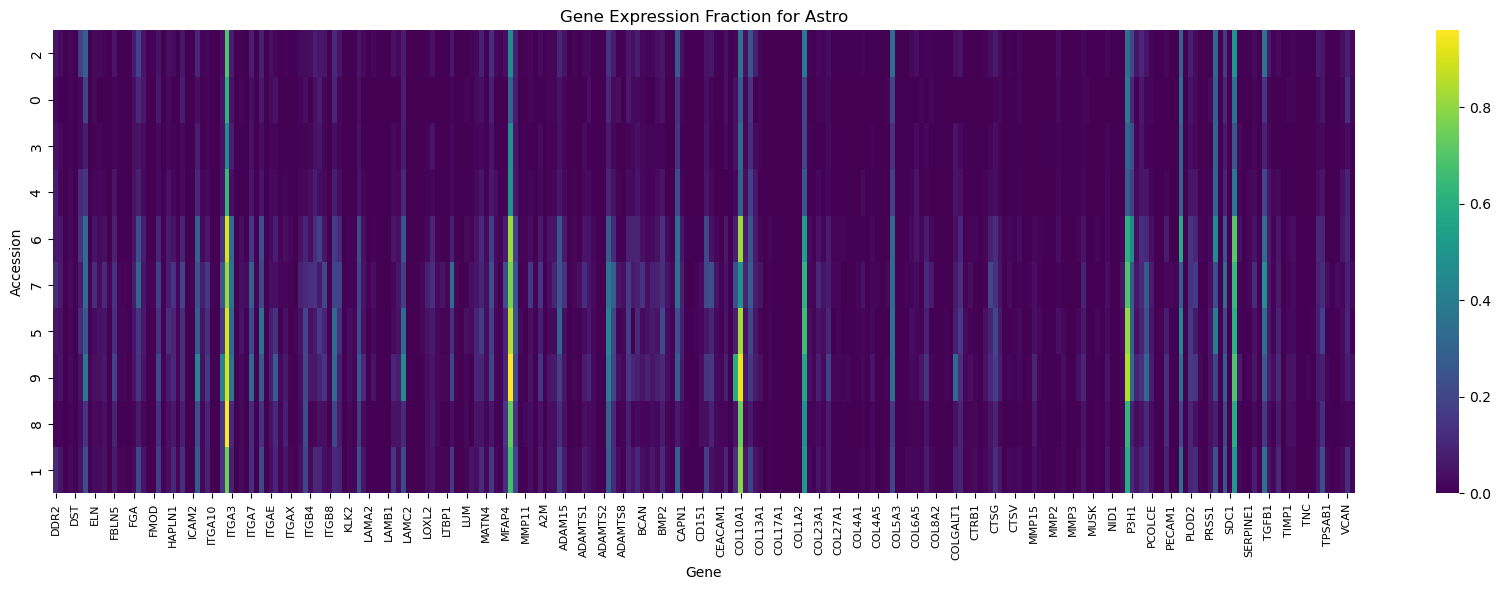

<module 'matplotlib.pyplot' from '/home/lijia/zhangjiaxuan/.conda/envs/BPCells/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [284]:
sfg_df = fraction_accCT_table(adata=sfg_adata, goi=goi)
fraction_per_disease(combined_df=sfg_df, goi=goi, celltype_of_interest='Astro')

In [87]:
# Define a threshold for gene expression
threshold = 0.5

accessions = adata.obs['accession'].unique()
celltypes = adata.obs['celltype'].unique()

# Initialize a DataFrame to store the results
df = pd.DataFrame(index=pd.MultiIndex.from_product([accessions, celltypes], names=['accession', 'celltype']), columns=goi)

# Traverse through all combinations of accession and celltype
for accession in accessions:
    for celltype in celltypes:
        # Filter the data for the accession and celltype of interest
        adata_filtered = adata[(adata.obs['accession'] == accession) & (adata.obs['celltype'] == celltype)]
        # Filter the data for the genes of interest
        adata_filtered = adata_filtered[:, adata_filtered.var_names.isin(goi)]

        # Calculate the fraction of cells where the gene is expressed
        # Convert the sparse matrix to a dense one before applying np.where
        expressed = np.where(adata_filtered.X.toarray() >= threshold, 1, 0)
        fraction_expressed = np.sum(expressed, axis=0) / adata_filtered.X.shape[0] if adata_filtered.X.shape[0] > 0 else 0

        # Store the fraction expressed in the DataFrame
        df.loc[(accession, celltype)] = fraction_expressed


# Assume that df is your DataFrame and adata is your AnnData object
metadata = adata.obs
metadata = metadata.groupby(['accession', 'celltype']).first()


# Merge the DataFrame with the metadata
combined_df = df.merge(metadata, left_index=True, right_index=True)



In [356]:
new_dt = fraction_accCT_table(adata, goi)

In [8]:
def gene_ct_fraction_plot(combined_df, goi, groupby='celltype', x_padding=1.5, y_padding=0.8):
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    ct_len = len(combined_df.index.unique('celltype'))
    df_exp_cell = combined_df[goi].multiply(combined_df['num_cells'], axis=0)
    # df_exp_cell = df_exp_cell / (df_exp_cell.max() + 1e-10)
    # Create a new DataFrame to store the results
    # index = pd.MultiIndex.from_product([goi, ['mean_expression', 'fraction_expressing']])
    # # Create a new DataFrame with the multi-index
    # result = pd.DataFrame(columns=index)

    # # Calculate the mean expression and fraction of cells expressing each gene
    # for gene in goi:
    #     # Calculate the mean expression of the gene in each group
    #     mean_fraction = combined_df.groupby(groupby)[gene].mean()
    #     # Calculate the fraction of cells expressing the gene in each group
    #     mean_exp_cellNum = df_exp_cell.groupby(groupby)[gene].mean()
    #     # Store the results in the DataFrame
    #     result[(gene, 'mean_fraction')] = mean_fraction
    #     result[(gene, 'mean_exp_cellNum')] = mean_exp_cellNum

    if len(goi) >= 100:
        fig_width = len(goi) // 5
    else:
        fig_width = 14

    # Create a figure
    fig, ax = plt.subplots(figsize=(fig_width, 1.2*ct_len))

    # Assuming 'result' is your DataFrame containing 'mean_expression' and 'fraction_expressing' for each gene
    for gene in goi:
        mean_fraction = combined_df.groupby(groupby, observed=True)[gene].mean().fillna(0)
        # Calculate the fraction of cells expressing the gene in each group
        mean_exp_cellNum = df_exp_cell.groupby(groupby, observed=True)[gene].mean().fillna(0)
       
        # print(mean_fraction)
        # mean_exp_cellNum = result[(gene, 'mean_exp_cellNum')] / (result[(gene, 'mean_exp_cellNum')].max() + 1e-10)
        
        # print(mean_exp_cellNum)
        # # Replace any NaN values with 0
        # mean_fraction = mean_fraction
        # mean_exp_cellNum = mean_exp_cellNum.fillna(0)

        # The size and color of the dots are determined by the mean expression and fraction of cells expressing the gene
        # scatter = ax.scatter([gene]*len(mean_fraction), np.arange(len(mean_fraction)), s=mean_fraction*100, c=mean_exp_cellNum, cmap='Reds', vmin=0, vmax=1)
        scatter = ax.scatter([gene]*len(mean_fraction), np.arange(len(mean_fraction)), s=mean_exp_cellNum, c=mean_fraction, cmap='Reds', vmin=0, vmax=0.5)
        
    ax.set_yticks(np.arange(len(mean_fraction)))  # Set y-ticks to be the cell types
    ax.set_yticklabels(mean_fraction.index, fontsize=12)  # Set y-tick labels to be the cell types
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9) # Set x-tick labels to be goi
    ax.invert_yaxis()  # Invert y-axis

    # Set the x and y axis limits
    ax.set_xlim(-1.5, len(goi) + x_padding)
    ax.set_ylim(-1.5 + y_padding, len(mean_fraction))

    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="1%", pad=0.05)
    # ax.set_title(f'Mean Gene Expression Fraction for {disease_of_interest}, Expression Threshold: {threshold}')
    plt.colorbar(scatter, label='Mean Fraction', ax=ax, cax=cax, location = 'right')
    plt.show()
    return plt

In [8]:
gene_ct_fraction_plot(combined_df=frac_table, goi=goi)

NameError: name 'plt' is not defined

In [694]:
def gene_ct_fraction_delta(combined_df, goi, groupby='celltype', x_padding=1.5, y_padding=0.8):
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    diseases = combined_df[combined_df['disease'].notna()]['disease'].unique()
    ct_len = len(combined_df.index.unique('celltype'))
    df_exp_cell = combined_df[goi].multiply(combined_df['num_cells'], axis=0)

    if len(goi) >= 100:
        fig_width = len(goi) // 5
    else:
        fig_width = 14

    df_disease1 = combined_df[combined_df['disease'] == diseases[0]]
    d1_exp_cell = df_disease1[goi].multiply(df_disease1['num_cells'], axis=0)
    df_disease2 = combined_df[combined_df['disease'] == diseases[1]]
    d2_exp_cell = df_disease2[goi].multiply(df_disease2['num_cells'], axis=0)
    # Calculate the mean expression for each cell type
    df_mean1 = df_disease1[goi].apply(pd.to_numeric, errors='coerce').fillna(0).groupby(level='celltype', observed=True).mean()
    df_mean2 = df_disease2[goi].apply(pd.to_numeric, errors='coerce').fillna(0).groupby(level='celltype', observed=True).mean()
    df_diff = df_mean1 / (df_mean2 + 0.0001)

    exp_mean1 = d1_exp_cell[goi].apply(pd.to_numeric, errors='coerce').fillna(0).groupby(level='celltype', observed=True).mean()
    exp_mean2 = d2_exp_cell[goi].apply(pd.to_numeric, errors='coerce').fillna(0).groupby(level='celltype', observed=True).mean()
    exp_diff = exp_mean1 / (exp_mean2 + 0.0001) * 500

    # Create a figure
    fig, ax = plt.subplots(figsize=(fig_width, 1.2*ct_len))

    # Assuming 'result' is your DataFrame containing 'mean_expression' and 'fraction_expressing' for each gene
    for gene in goi:
        # Calculate the difference in mean expression
        mean_fraction = df_diff[gene]
        # Calculate the fraction of cells expressing the gene in each group
        mean_exp_cellNum = exp_diff[gene]

        scatter = ax.scatter([gene]*len(mean_fraction), np.arange(len(mean_fraction)), s=mean_exp_cellNum, c=mean_fraction, cmap='Reds', vmin=0, vmax=0.8)
        
    ax.set_yticks(np.arange(len(mean_fraction)))  # Set y-ticks to be the cell types
    ax.set_yticklabels(mean_fraction.index, fontsize=12)  # Set y-tick labels to be the cell types
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9) # Set x-tick labels to be goi
    ax.invert_yaxis()  # Invert y-axis

    # Set the x and y axis limits
    ax.set_xlim(-1.5, len(goi) + x_padding)
    ax.set_ylim(-1.5 + y_padding, len(mean_fraction))

    # create an axes on the right side of ax. The width of cax will be 5%
    # of ax and the padding between cax and ax will be fixed at 0.05 inch.
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="1%", pad=0.05)
    # ax.set_title(f'Mean Gene Expression Fraction for {disease_of_interest}, Expression Threshold: {threshold}')
    plt.colorbar(scatter, label='Mean Fraction', ax=ax, cax=cax, location = 'right')
    plt.show()
    return plt

In [692]:
norm_astro_adata = adata[(adata.obs['disease'] == 'Normal') & (adata.obs['celltype'] == 'Astro')]
norm_astro_adata

View of AnnData object with n_obs × n_vars = 457 × 67456
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'accession', 'Sample_ID', 'Batch', 'Mayo_ID', 'disease', 'Group', 'C9_pos', 'Sex', 'SubType', 'CellClass', 'DGE_group', 'orig.celltype', 'percent.mt', 'log10GenesPerUMI', 'experiment', 'celltype', 'gender', 'region', 'class', 'tissue'
    obsm: 'X_harmony', 'X_pca', 'X_umap'

/tmp/ipykernel_9446/889215836.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9) # Set x-tick labels to be goi


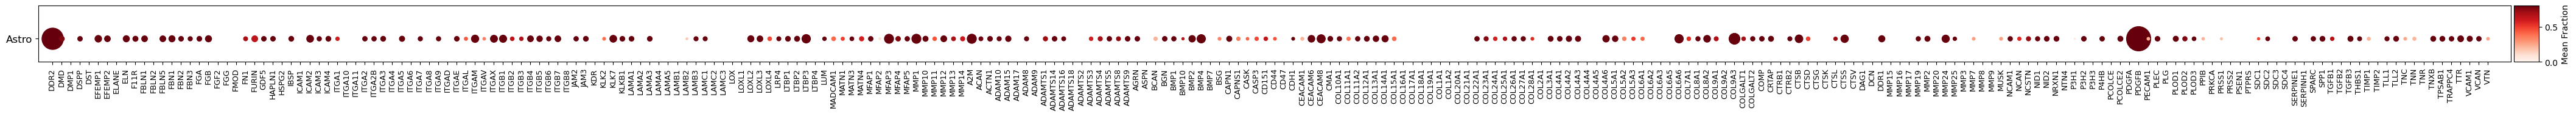

<module 'matplotlib.pyplot' from '/home/lijia/zhangjiaxuan/.conda/envs/BPCells/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [695]:
astro_delta = new_dt.loc[new_dt.index.get_level_values(1) == 'Astro']
gene_ct_fraction_delta(combined_df=astro_delta, goi=goi)

In [535]:
sfg_df = fraction_accCT_table(sfg_adata, goi)

/tmp/ipykernel_9446/1469423995.py:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9) # Set x-tick labels to be goi


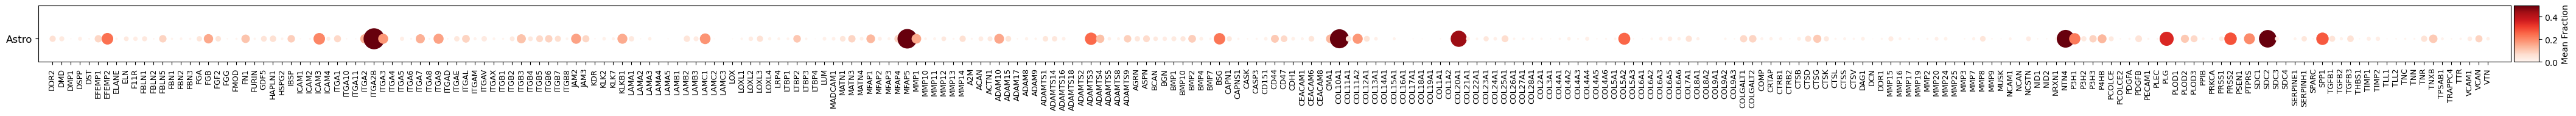

<module 'matplotlib.pyplot' from '/home/lijia/zhangjiaxuan/.conda/envs/BPCells/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [544]:
gene_ct_fraction_plot(combined_df=sfg_df, goi=goi)

/tmp/ipykernel_9446/467140756.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9) # Set x-tick labels to be goi


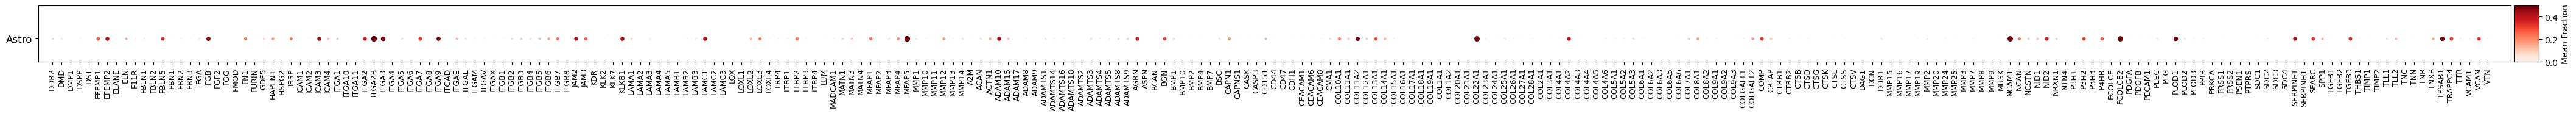

<module 'matplotlib.pyplot' from '/home/lijia/zhangjiaxuan/.conda/envs/BPCells/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [678]:
ec_df = fraction_accCT_table(ec_adata, goi)
astro_delta = new_dt.loc[new_dt.index.get_level_values(1) == 'Astro']
astro_als = new_dt.loc[(new_dt['disease'] != 'ALS') ]
astro_als = astro_als[astro_als.index.get_level_values(1) == 'Astro']
gene_ct_fraction_plot(combined_df=astro_als, goi=goi)

In [675]:
gene_ct_fraction_plot(combined_df=df_diff, goi=goi)

KeyError: 'num_cells'

/tmp/ipykernel_9446/467140756.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9) # Set x-tick labels to be goi


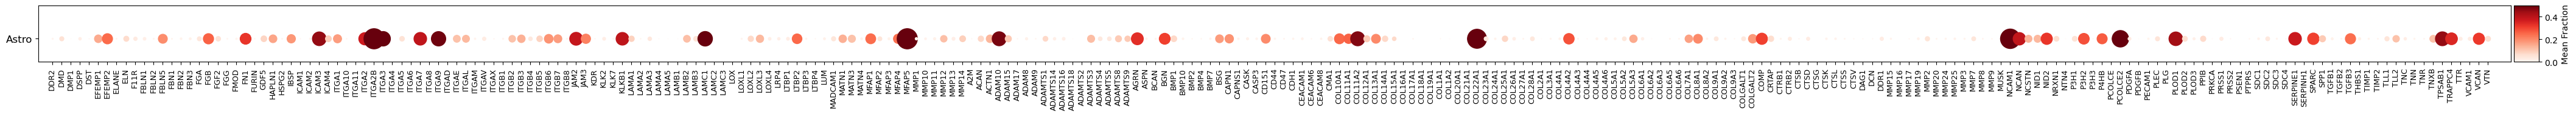

<module 'matplotlib.pyplot' from '/home/lijia/zhangjiaxuan/.conda/envs/BPCells/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [665]:
astro_als = new_dt.loc[(new_dt['disease'] == 'ALS') ]
astro_als = astro_als[astro_als.index.get_level_values(1) == 'Astro']
gene_ct_fraction_plot(combined_df=astro_als, goi=goi)

/tmp/ipykernel_9446/467140756.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9) # Set x-tick labels to be goi


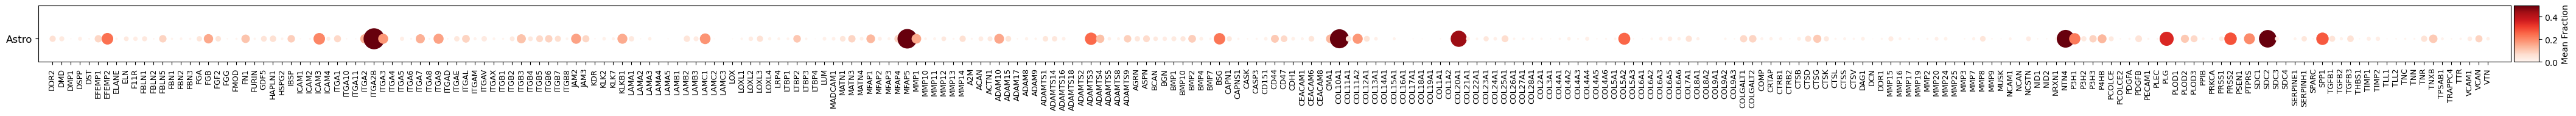

/tmp/ipykernel_9446/467140756.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9) # Set x-tick labels to be goi


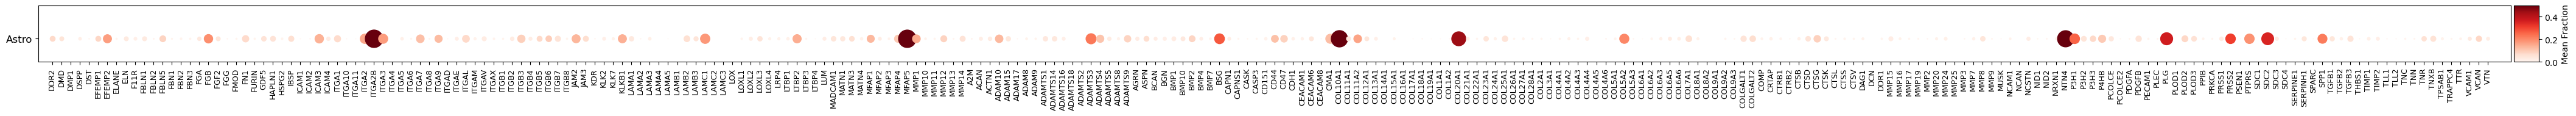

/tmp/ipykernel_9446/467140756.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9) # Set x-tick labels to be goi


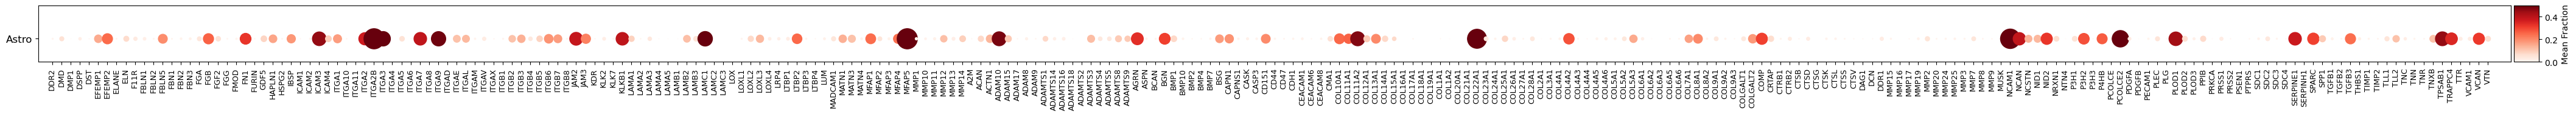

In [667]:
f1 = gene_ct_fraction_plot(combined_df=sfg_df, goi=goi)
f2 = gene_ct_fraction_plot(combined_df=ec_df, goi=goi)
f3 = gene_ct_fraction_plot(combined_df=astro_als, goi=goi)

/tmp/ipykernel_9446/4260399701.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9) # Set x-tick labels to be goi


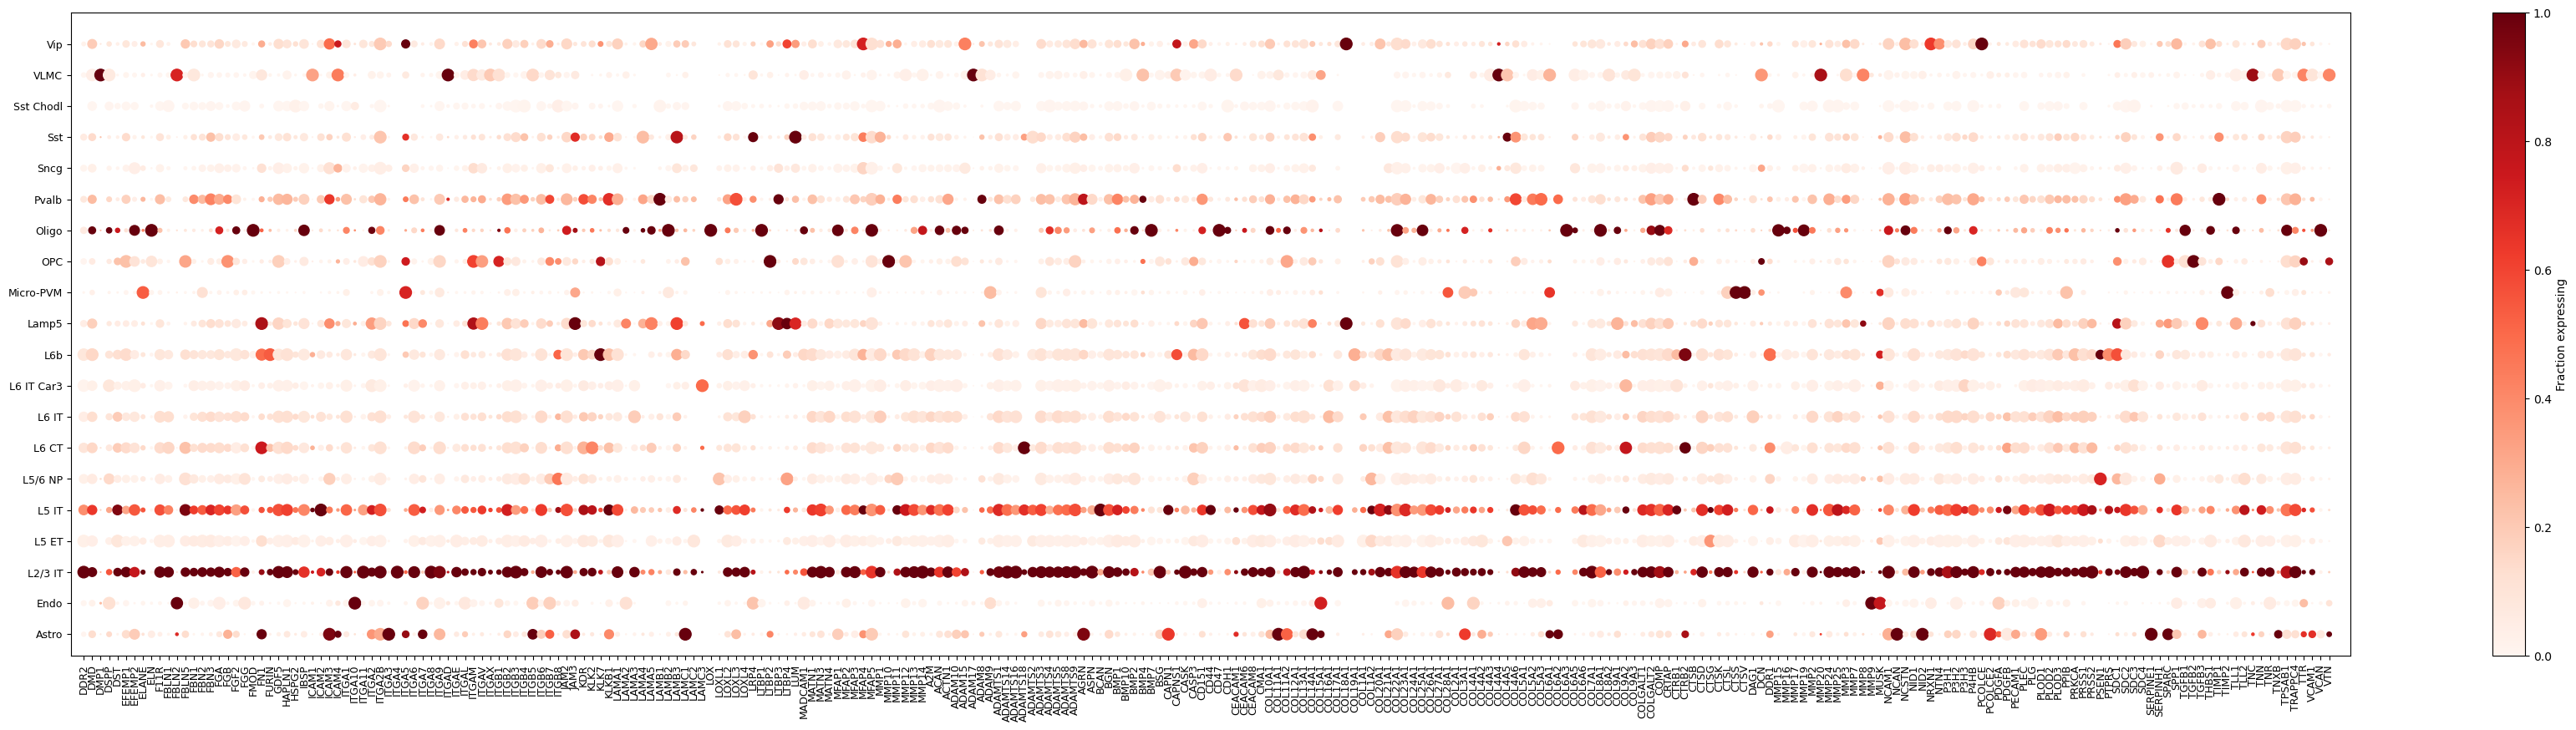

In [397]:
groupby = 'celltype'
# Create a new DataFrame to store the results
index = pd.MultiIndex.from_product([goi, ['mean_expression', 'fraction_expressing']])
# Create a new DataFrame with the multi-index
result = pd.DataFrame(columns=index)
x_padding = 1.5
y_padding = 0.8 


# Calculate the mean expression and fraction of cells expressing each gene
for gene in goi:
    # Calculate the mean expression of the gene in each group
    mean_expression = new_dt.groupby(groupby)[gene].mean()

    # Calculate the fraction of cells expressing the gene in each group
    fraction_expressing = new_dt_exp_cell.groupby(groupby)[gene].mean()

    # Store the results in the DataFrame
    result[(gene, 'mean_expression')] = mean_expression
    result[(gene, 'fraction_expressing')] = fraction_expressing

if len(goi) >= 100:
    fig_width = len(goi) // 6
else:
    fig_width = 14

# Create a figure
fig, ax = plt.subplots(figsize=(fig_width, 10))

# Assuming 'result' is your DataFrame containing 'mean_expression' and 'fraction_expressing' for each gene
for gene in goi:
    # Normalize the values to between 0 and 1 for plotting
    mean_expression = result[(gene, 'mean_expression')] / (result[(gene, 'mean_expression')].max() + 1e-10)
    fraction_expressing = result[(gene, 'fraction_expressing')] / (result[(gene, 'fraction_expressing')].max() + 1e-10)

    # Replace any NaN values with 0
    mean_expression = mean_expression.fillna(0)
    fraction_expressing = fraction_expressing.fillna(0)

    # The size and color of the dots are determined by the mean expression and fraction of cells expressing the gene
    scatter = ax.scatter([gene]*len(mean_expression), np.arange(len(mean_expression)), s=mean_expression*100, c=fraction_expressing, cmap='Reds', vmin=0, vmax=1)

ax.set_yticks(np.arange(len(mean_expression)))  # Set y-ticks to be the cell types
ax.set_yticklabels(mean_expression.index, fontsize=9)  # Set y-tick labels to be the cell types
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=9) # Set x-tick labels to be goi
ax.invert_yaxis()  # Invert y-axis

# Set the x and y axis limits
ax.set_xlim(-1.5, len(goi) + x_padding)
ax.set_ylim(-1.5 + y_padding, len(mean_expression))

# ax.set_title(f'Mean Gene Expression Fraction for {disease_of_interest}, Expression Threshold: {threshold}')
plt.colorbar(scatter, label='Fraction expressing', ax=ax)
plt.show()

In [127]:
def fraction_per_disease(combined_df, goi):
    # Get all unique diseases
    diseases = combined_df[combined_df['disease'].notna()]['disease'].unique()

    # Calculate global min and max for the color scale
    global_min = combined_df[goi].apply(pd.to_numeric, errors='coerce').fillna(0).min().min()
    global_max = combined_df[goi].apply(pd.to_numeric, errors='coerce').fillna(0).max().max()

    # Lower the color legend max
    color_legend_max = global_max * 0.6  # Adjust this value as needed
    if len(goi) >= 100:
        fig_width = len(goi) // 10
    else:
        fig_width = 14
    # Create a figure with a subplot for each disease
    fig, axs = plt.subplots(len(diseases), 1, figsize=(fig_width, 6 * len(diseases)))

    for ax, disease_of_interest in zip(axs, diseases):
        # Filter the DataFrame for the disease of interest
        df_disease = combined_df[combined_df['disease'] == disease_of_interest]

        # Calculate the mean expression for each cell type
        df_mean = df_disease[goi].apply(pd.to_numeric, errors='coerce').fillna(0).groupby(level='celltype').mean()
        # Create a heatmap in the subplot
        sns.heatmap(df_mean, cmap='viridis', ax=ax, vmin=global_min, vmax=color_legend_max)
        ax.set_xlabel('Gene')
        ax.set_ylabel('Cell Type')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
        ax.set_title(f'Mean Gene Expression Fraction for {disease_of_interest}, Expression Threshold: {threshold}')

    plt.tight_layout()
    plt.show()
    return plt


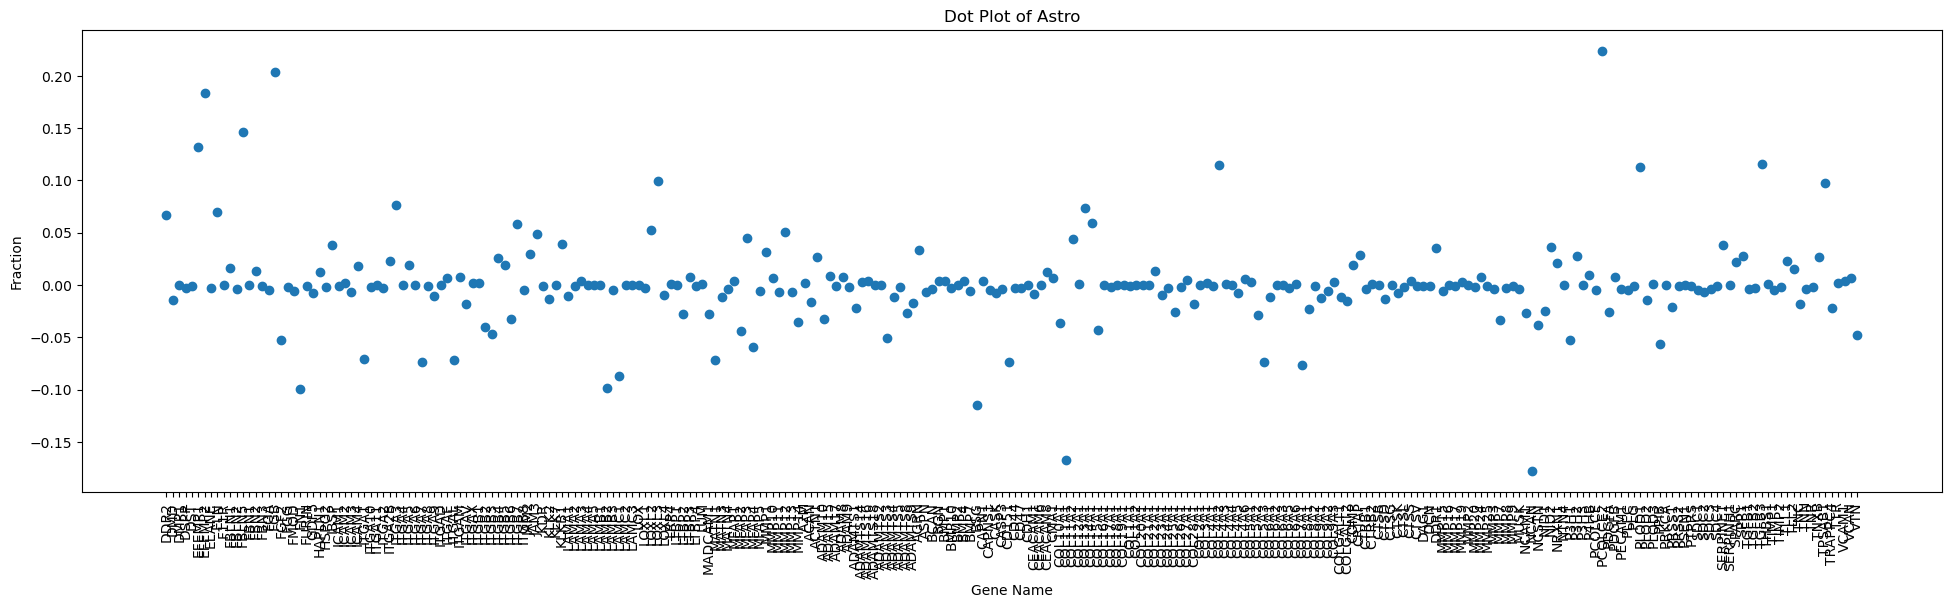

In [251]:
astro_df = df_diff.loc['Astro']

fig, ax = plt.subplots(figsize=(24, 6))

# Create dot plot
ax.scatter(astro_df.index, astro_df.values)
ax.set_xlabel('Gene Name')
ax.set_ylabel('Fraction')
ax.set_title('Dot Plot of Astro')
ax.set_xticks(range(df_diff.shape[1]))
ax.set_xticklabels(df_diff.columns, rotation=90)
plt.show()

In [319]:
diseases = combined_df[combined_df['disease'].notna()]['disease'].unique()
df_disease1 = combined_df[combined_df['disease'] == diseases[0]]
df_disease2 = combined_df[combined_df['disease'] == diseases[1]]

df_mean1 = df_disease1[goi].apply(pd.to_numeric, errors='coerce').fillna(0).groupby(level='celltype').mean()
df_mean2 = df_disease2[goi].apply(pd.to_numeric, errors='coerce').fillna(0).groupby(level='celltype').mean()

df_diff = df_mean1 - df_mean2

# Calculate the fraction of cells expressing each gene
df_fraction = df_diff.groupby(level='celltype').mean()

# Adjust the scale of the fractions
df_fraction_scaled = abs(df_fraction) * 100  # Scale by a constant

In [320]:
df_diff

DDR2       DMD      DMP1      DSPP       DST    EFEMP1   
celltype                                                                 
Astro       0.066521 -0.014052 -0.000086 -0.002370 -0.000592  0.132311  \
Endo        0.080068  0.000490 -0.001048 -0.080117 -0.001159  0.066386   
L2/3 IT     0.489240  0.014315  0.000010 -0.007396 -0.002525  0.073388   
L5 ET       0.467352  0.023076  0.000000  0.000446 -0.003391  0.028385   
L5 IT       0.338045  0.023559  0.000011 -0.002690 -0.004867 -0.011506   
L5/6 NP     0.277326 -0.004757  0.000803  0.052963 -0.004722  0.036562   
L6 CT       0.330763  0.024768  0.000308 -0.003561  0.004521  0.083115   
L6 IT       0.311978 -0.002148  0.000000  0.000520 -0.006011  0.024332   
L6 IT Car3  0.482884  0.038349  0.000000  0.054766 -0.003827 -0.035131   
L6b         0.495930 -0.013475  0.000000 -0.003988 -0.003571  0.042499   
Lamp5       0.142360  0.031360  0.000000  0.005159 -0.002106  0.004092   
Micro-PVM   0.008281 -0.025378  0.000000 -0.005925 -0.000447  0.070584   
OPC         0.108087 -0.005751  0.000000  0.000343 -0.011228  0.099718   
Oligo       0.148627 -0.022476 -0.000044  0.001472 -0.001354  0.027262   
Pvalb       0.130581  0.035075  0.000000  0.005091  0.000519  0.006995   
Sncg        0.135085  0.033377  0.000000  0.004402 -0.000252  0.036579   
Sst         0.139060  0.023450  0.000359 -0.000815  0.001042  0.124814   
Sst Chodl   0.000000  0.089791  0.000000 -0.029491 -0.007576 -0.035877   
VLMC        0.054325  0.076140  0.123958  0.117118 -0.000713 -0.042114   
Vip         0.049534  0.028148  0.000215  0.002928  0.000641  0.050811   

              EFEMP2     ELANE       ELN      F11R  ...       TNC       TNN   
celltype                                            ...                       
Astro       0.183761 -0.002739  0.069904 -0.000272  ... -0.017766 -0.003460  \
Endo        0.007261 -0.008006 -0.001272 -0.014473  ...  0.048839 -0.000537   
L2/3 IT     0.214106 -0.000073 -0.003832  0.085592  ... -0.001934 -0.005731   
L5 ET       0.204545 -0.009297 -0.014838  0.166311  ... -0.005941 -0.016592   
L5 IT       0.255171 -0.000473 -0.006510  0.107201  ... -0.002899 -0.003057   
L5/6 NP     0.083760 -0.002946 -0.005277  0.091988  ...  0.002412 -0.005118   
L6 CT       0.247355  0.001191 -0.006694  0.137361  ... -0.001958 -0.005323   
L6 IT       0.194148 -0.002385 -0.002713  0.125303  ... -0.000452 -0.007728   
L6 IT Car3  0.457024 -0.006571 -0.006940  0.141172  ...  0.000651 -0.002038   
L6b         0.080552  0.000815  0.002586  0.084574  ... -0.000840 -0.006727   
Lamp5       0.038801  0.005374  0.003880  0.073247  ...  0.018448 -0.001594   
Micro-PVM   0.021553  0.071279  0.015891  0.019710  ... -0.002704 -0.001902   
OPC         0.123567  0.006061  0.083719  0.001828  ... -0.000825 -0.000881   
Oligo       0.220137 -0.001017  0.217324  0.011388  ...  0.000070  0.000343   
Pvalb       0.045149  0.000971 -0.006481  0.112930  ... -0.000166 -0.003003   
Sncg        0.124948  0.010943 -0.000583  0.076812  ...  0.002486  0.007039   
Sst         0.022482  0.000019 -0.004710  0.058058  ...  0.001007  0.002677   
Sst Chodl   0.077994  0.000000  0.015097  0.002507  ...  0.000000  0.008658   
VLMC        0.024836 -0.006758 -0.008876  0.011962  ...  0.476992  0.016641   
Vip         0.045187  0.003758 -0.003513  0.044770  ...  0.000377  0.002287   

                 TNR      TNXB    TPSAB1   TRAPPC4       TTR     VCAM1   
celltype                                                                 
Astro      -0.001785  0.026615  0.097290 -0.021516  0.002279  0.003970  \
Endo       -0.197385  0.043992  0.147130 -0.042873 -0.086991 -0.001387   
L2/3 IT    -0.019087 -0.001021  0.000571  0.046460 -0.001026 -0.008649   
L5 ET      -0.070332  0.015385  0.000000  0.095947 -0.003501 -0.004355   
L5 IT      -0.010026 -0.001714  0.003324  0.070439  0.003969  0.000002   
L5/6 NP     0.007463  0.003053  0.008166  0.106438 -0.000170 -0.000688   
L6 CT       0.005167 -0.004578 -0.000305  0.108265 -0.00

/tmp/ipykernel_9446/787952527.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_diff.index, rotation=90, fontsize=8)


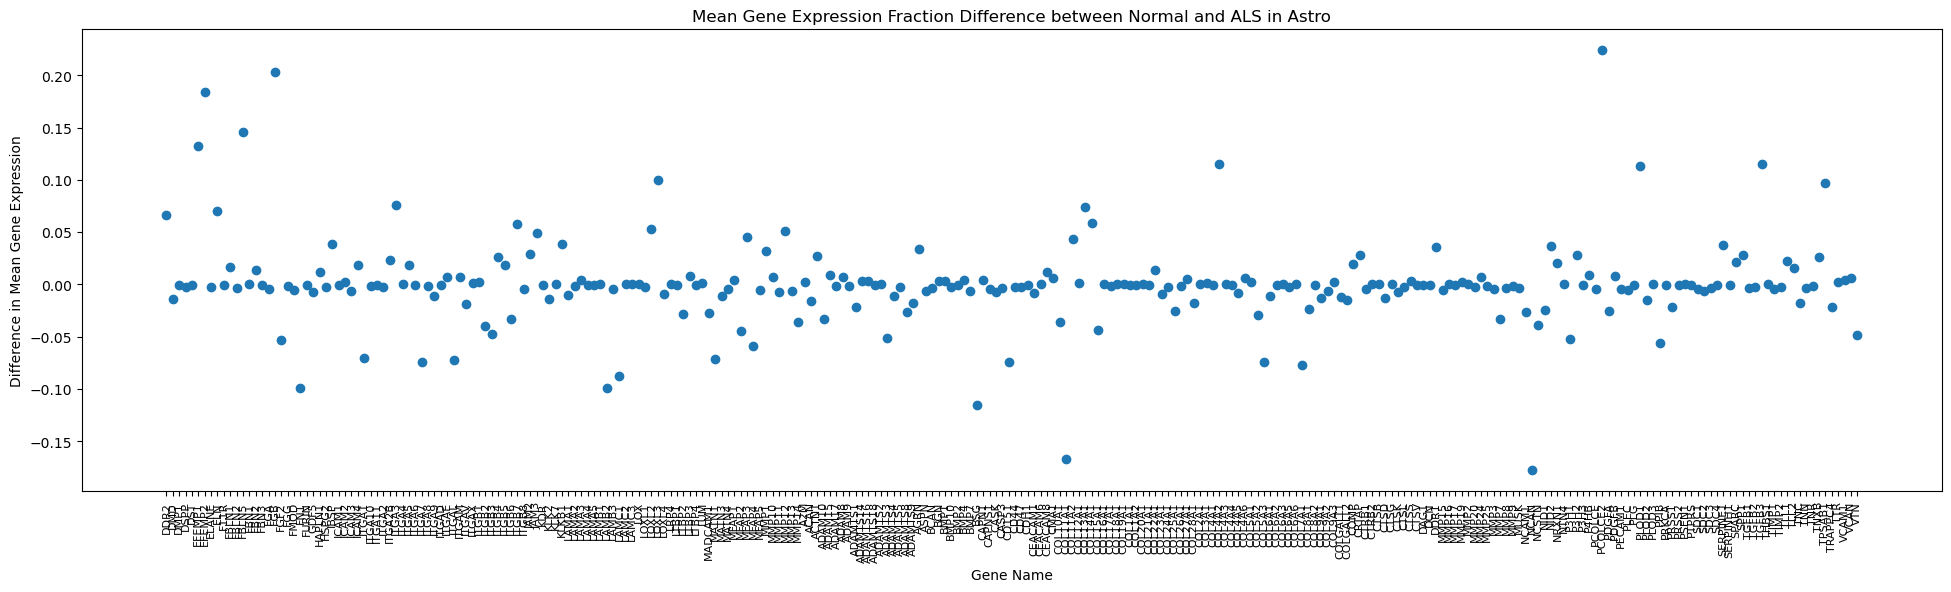

In [316]:
fig, ax = plt.subplots(figsize=(24, 6))

# Create dot plot
ax.scatter(df_diff.index, df_diff.values)
ax.set_ylabel('Difference in Mean Gene Expression')
ax.set_xlabel('Gene Name')
ax.set_title(f'Mean Gene Expression Fraction Difference between {diseases[0]} and {diseases[1]} in {celltype_of_interest}')
ax.set_xticklabels(df_diff.index, rotation=90, fontsize=8)
plt.show()

In [334]:
import seaborn as sns

def fraction_difference_dotplot(combined_df, goi, celltype_of_interest='Astro'):
    diseases = combined_df[combined_df['disease'].notna()]['disease'].unique()
    df_disease1 = combined_df[combined_df['disease'] == diseases[0]]
    df_disease2 = combined_df[combined_df['disease'] == diseases[1]]

    df_mean1 = df_disease1[goi].apply(pd.to_numeric, errors='coerce').fillna(0).groupby(level='celltype').mean()
    df_mean2 = df_disease2[goi].apply(pd.to_numeric, errors='coerce').fillna(0).groupby(level='celltype').mean()

    df_diff = df_mean1 - df_mean2

    # Calculate the fraction of cells expressing each gene
    df_fraction = df_diff.groupby(level='celltype').mean()

    # Adjust the scale of the fractions
    df_fraction_scaled = abs(df_fraction) * 250  # Scale by a constant

    global_min = df_diff.quantile(0.01).min()
    global_max = df_diff.quantile(0.99).max()
    print(global_min, global_max)

    if len(goi) >= 100:
        fig_width = len(goi) // 10
    else:
        fig_width = 14

    fig, ax = plt.subplots(figsize=(fig_width, 6))

    for i in range(df_diff.shape[1]):
        ax.scatter(np.repeat(i, df_diff.shape[0]), df_diff.iloc[:, i], s=df_fraction_scaled.iloc[:, i], color='b', alpha=0.2)
        ax.scatter(i, df_diff.iloc[:, i].mean(), s=df_fraction_scaled.iloc[:, i].mean(), color='r')


    ax.set_ylabel('Difference in Mean Gene Expression')
    ax.set_xlabel('Gene Name')
    ax.set_title(f'Mean Gene Expression Fraction Difference between {diseases[0]} and {diseases[1]}')
    ax.set_xticks(range(df_diff.shape[1]))
    ax.set_xticklabels(df_diff.columns, rotation=90, fontsize=6)
    plt.tight_layout()
    plt.show()
    return plt


-0.3529091394027482 0.501265901118817


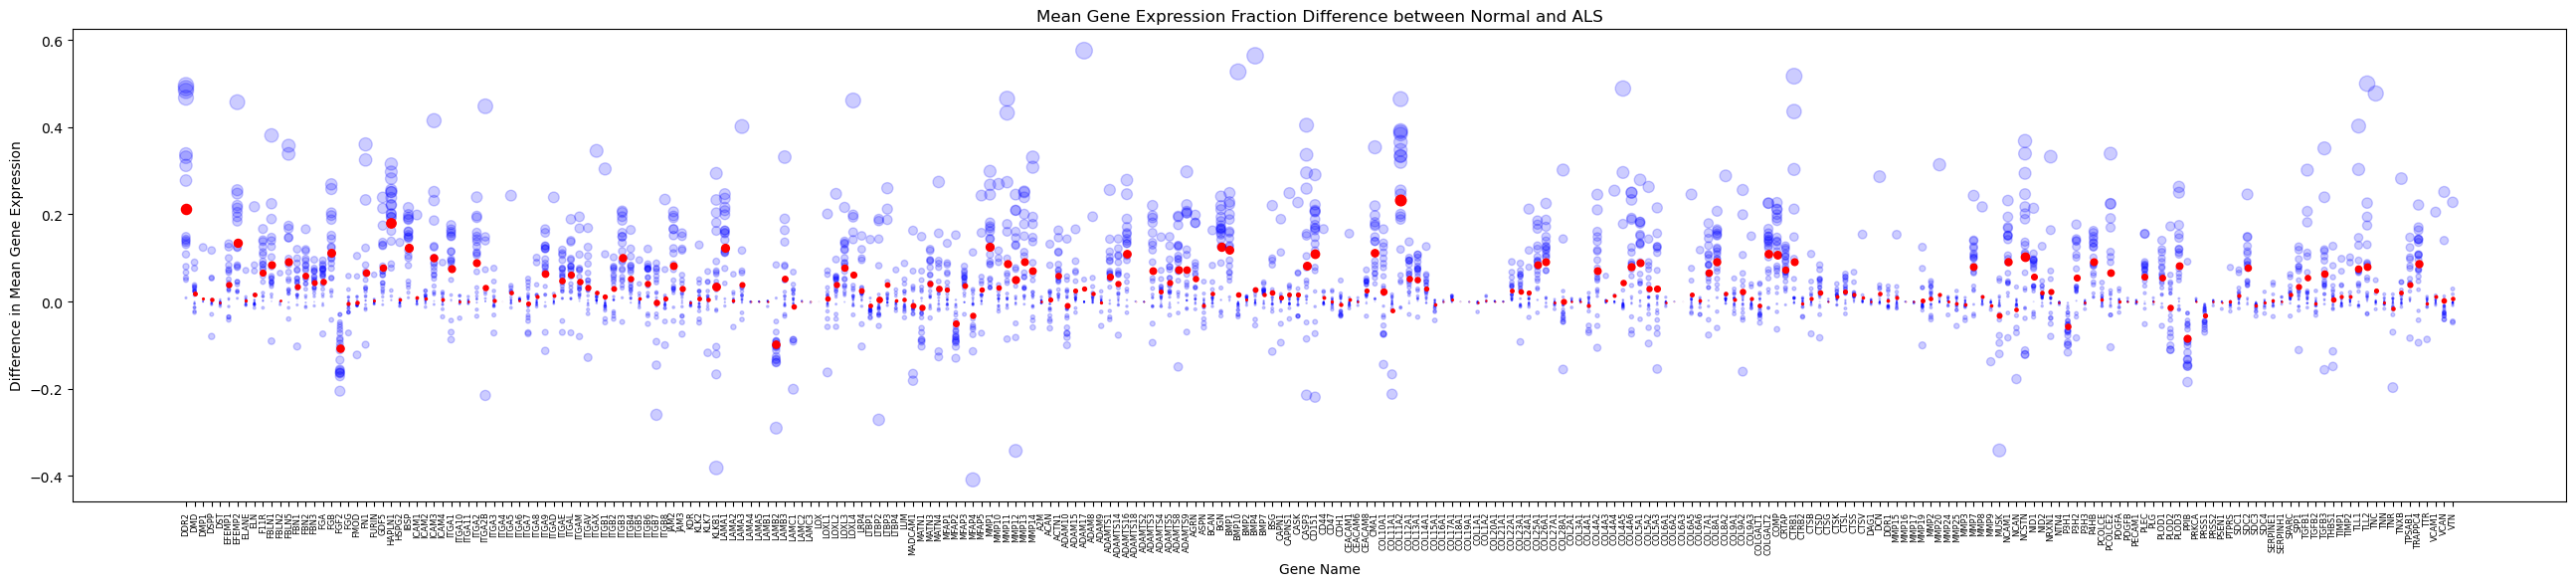

<module 'matplotlib.pyplot' from '/home/lijia/zhangjiaxuan/.conda/envs/BPCells/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [336]:
fraction_difference_dotplot(combined_df, goi, 'Astro')

In [233]:
def fraction_ratio(combined_df, goi, threshold=0.5):
    diseases = combined_df[combined_df['disease'].notna()]['disease'].unique()
    # Filter the DataFrame for the diseases of interest
    df_disease1 = combined_df[combined_df['disease'] == diseases[0]]
    df_disease2 = combined_df[combined_df['disease'] == diseases[1]]

    # Calculate the mean expression for each cell type
    df_mean1 = df_disease1[goi].apply(pd.to_numeric, errors='coerce').fillna(0).groupby(level='celltype').mean()
    df_mean2 = df_disease2[goi].apply(pd.to_numeric, errors='coerce').fillna(0).groupby(level='celltype').mean()

    # Calculate the difference in mean expression
    df_diff = df_mean1 / (df_mean2 + 0.0001)

    # Calculate global min and max for the color scale
    global_min = df_diff.min().quantile(0.05)
    global_max = df_diff.max().quantile(0.40)
    print(global_min, global_max)

    # Lower the color legend max
    color_legend_max = global_max * 0.6  # Adjust this value as needed

    if len(goi) >= 100:
        fig_width = len(goi) // 10
    else:
        fig_width = 14

    # Create a figure
    fig, ax = plt.subplots(figsize=(fig_width, 6))

    # Create a heatmap of the difference
    sns.heatmap(df_diff, cmap='viridis', ax=ax, vmin=global_min, vmax=color_legend_max)
    ax.set_xlabel('Gene')
    ax.set_ylabel('Cell Type')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
    ax.set_title(f'Mean Gene Expression Fraction Difference between {diseases[0]} and {diseases[1]}, Expression Threshold: {threshold}')

    plt.tight_layout()
    plt.show()
    return plt


0.0 9.45179584120983


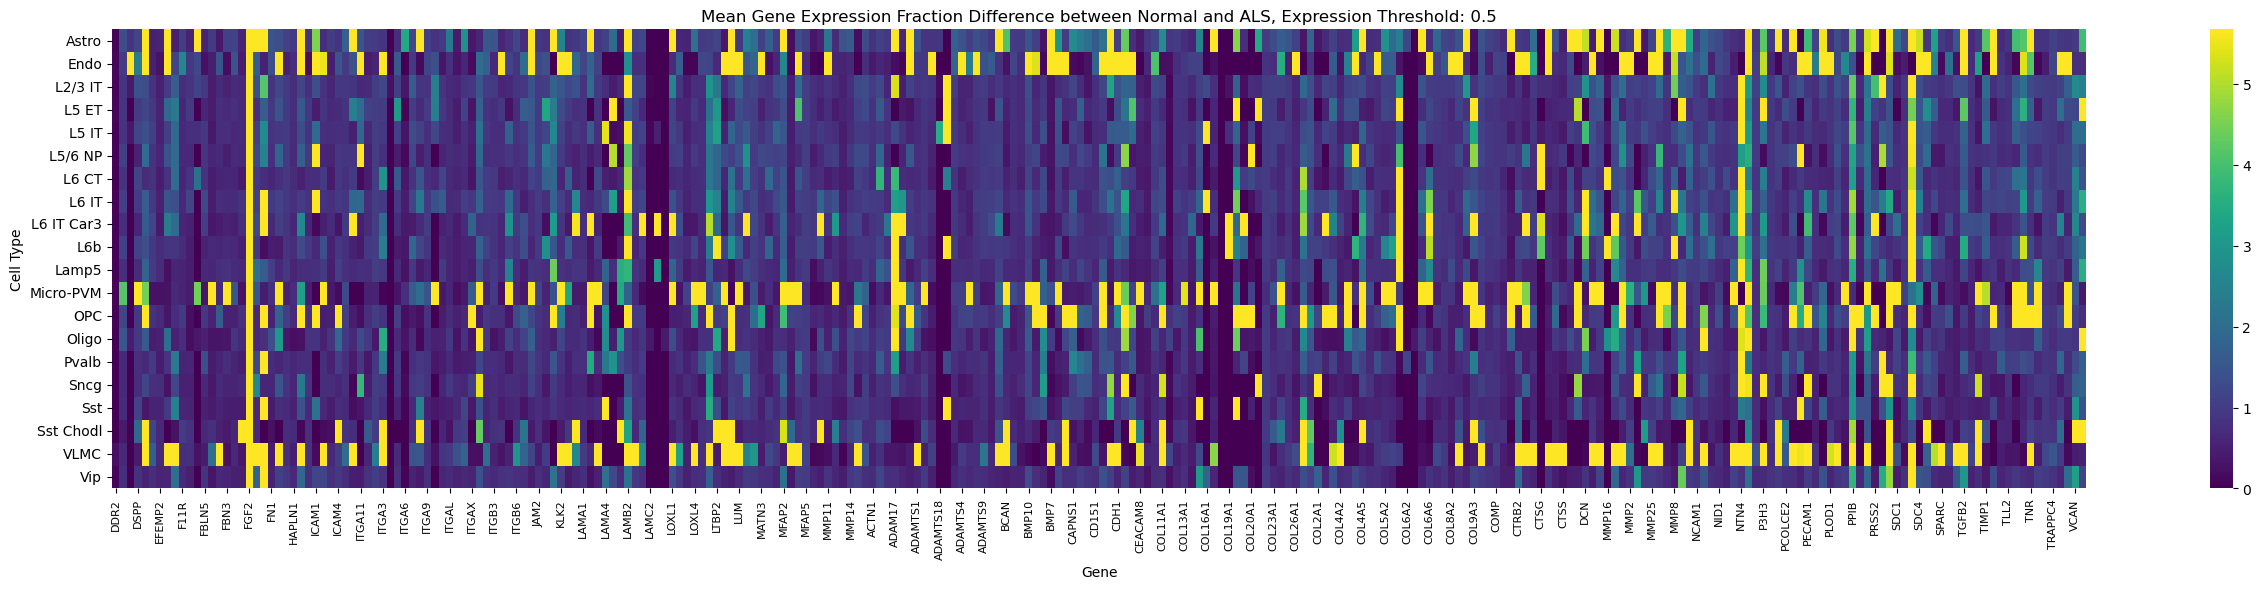

<module 'matplotlib.pyplot' from '/home/lijia/zhangjiaxuan/.conda/envs/BPCells/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [179]:
fraction_difference(combined_df, goi, threshold=0.5)

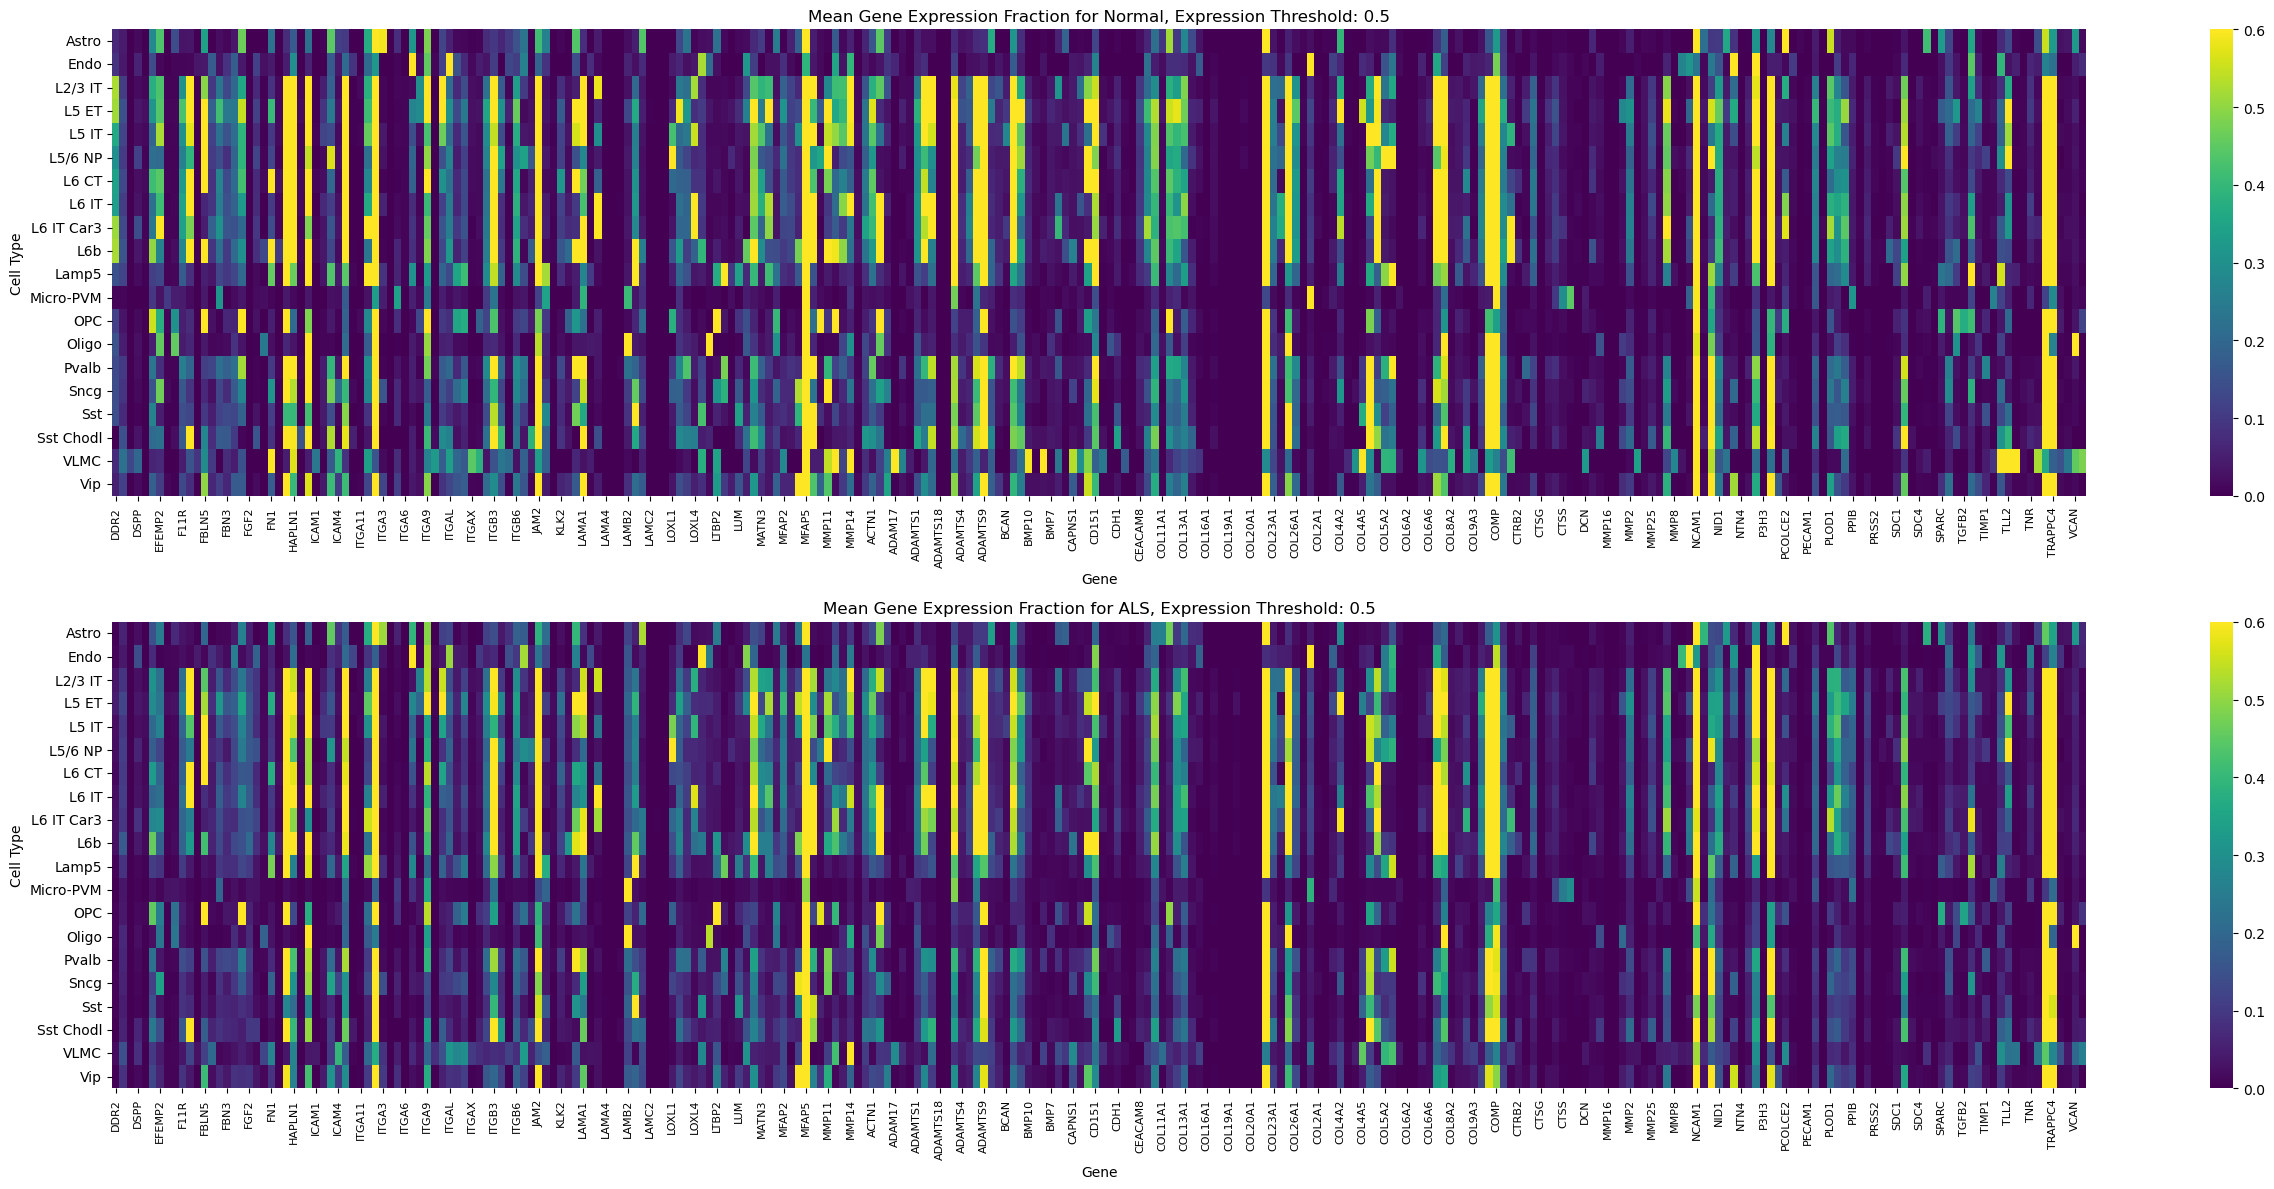

<module 'matplotlib.pyplot' from '/home/lijia/zhangjiaxuan/.conda/envs/BPCells/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [128]:
fraction_per_disease(combined_df, goi)

In [268]:
def fraction_per_disease(combined_df, goi, celltype_of_interest):
    # Filter the DataFrame for the celltype of interest
    df_celltype = combined_df.xs(celltype_of_interest, level='celltype')
    # Filter the DataFrame for the gene columns
    df_celltype = df_celltype[goi].apply(pd.to_numeric, errors='coerce').fillna(0)

    if len(goi) >= 100:
        fig_width = len(goi) // 15
    else:
        fig_width = 14

    # Create a figure
    fig, ax = plt.subplots(figsize=(fig_width, 6))
    sns.heatmap(df_celltype, cmap='viridis')
    ax.set_xlabel('Gene')
    ax.set_ylabel('Accession')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
    ax.set_title(f'Gene Expression Fraction for {celltype_of_interest}')
    plt.tight_layout()
    plt.show()
    return plt

In [ ]:
def fraction_per_disease(combined_df, goi, celltype_of_interest):
    # Filter the DataFrame for the celltype of interest
    df_celltype = combined_df.xs(celltype_of_interest, level='celltype')
    # Filter the DataFrame for the gene columns
    df_celltype = df_celltype[goi].apply(pd.to_numeric, errors='coerce').fillna(0)

    if len(goi) >= 100:
        fig_width = len(goi) // 15
    else:
        fig_width = 14

    # Create a figure
    fig, ax = plt.subplots(figsize=(fig_width, 6))
    sns.heatmap(df_celltype, cmap='viridis')
    ax.set_xlabel('Gene')
    ax.set_ylabel('Accession')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
    ax.set_title(f'Gene Expression Fraction for {celltype_of_interest}')
    plt.tight_layout()
    plt.show()
    return plt

In [348]:
def fraction_dot_disease(combined_df, goi, celltype_of_interest):
    # Filter the DataFrame for the celltype of interest
    df_celltype = combined_df.xs(celltype_of_interest, level='celltype')
    # Filter the DataFrame for the gene columns
    df_celltype = df_celltype[goi].apply(pd.to_numeric, errors='coerce').fillna(0)

    if len(goi) >= 100:
        fig_width = len(goi) // 15
    else:
        fig_width = 14

    # Create a figure
    fig, ax = plt.subplots(figsize=(fig_width, 6))

     # Loop over the DataFrame rows
    for i in range(df_celltype.shape[0]):
        # Create a scatter plot for each row
        ax.scatter(df_celltype.columns, df_celltype.iloc[i, :] * 100, label=df_celltype.index[i])

    # Set the y-axis labels to be the DataFrame's index values
    ax.set_xticks(range(df_celltype.shape[1]))
    ax.set_xticklabels(df_celltype.columns)
    ax.set_yticks(range(df_celltype.shape[0]))
    ax.set_yticklabels(df_celltype.index)
    ax.set_xlabel('Gene')
    ax.set_ylabel('Accession')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
    ax.set_title(f'Gene Expression Fraction for {celltype_of_interest}')
    plt.tight_layout()
    plt.show()
    return plt


In [340]:
als_df = combined_df[combined_df['disease'] == diseases[1]]

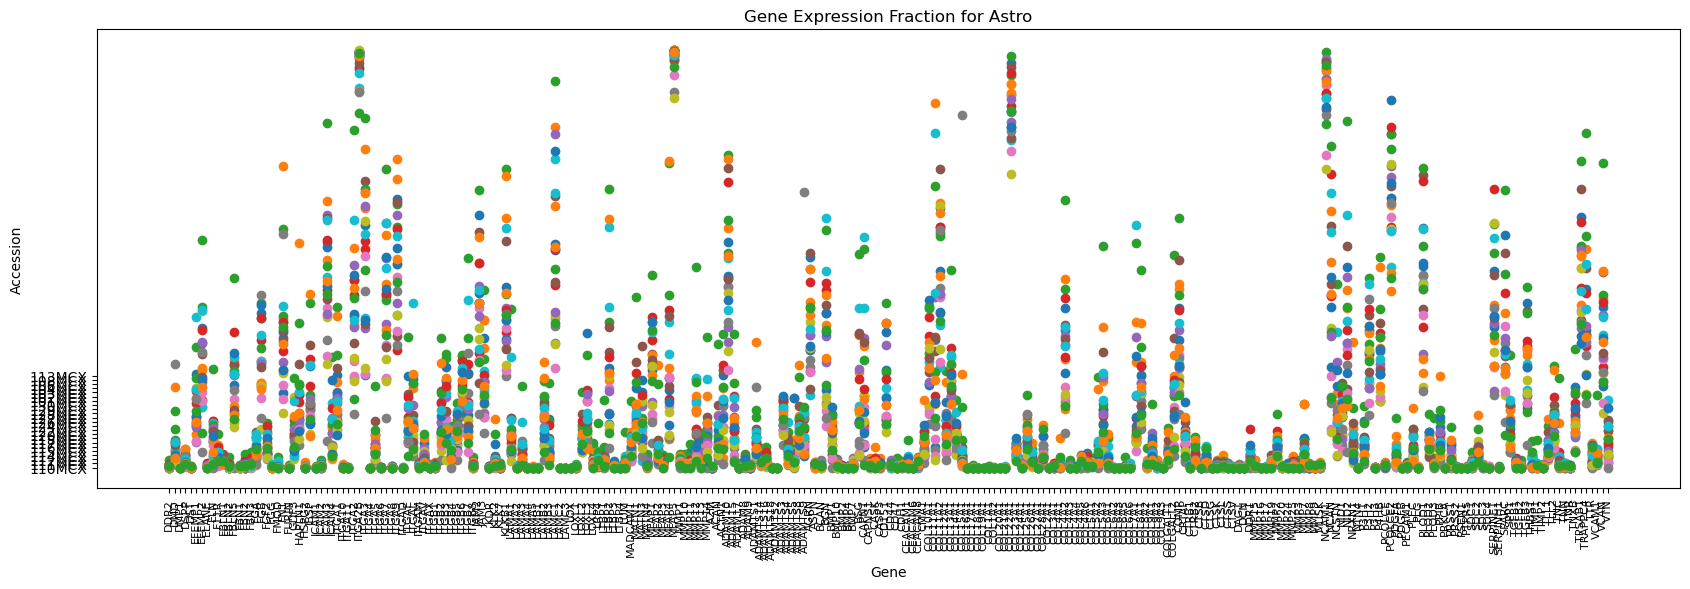

<module 'matplotlib.pyplot' from '/home/lijia/zhangjiaxuan/.conda/envs/BPCells/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [349]:
fraction_dot_disease(als_df, goi, celltype_of_interest='Astro')

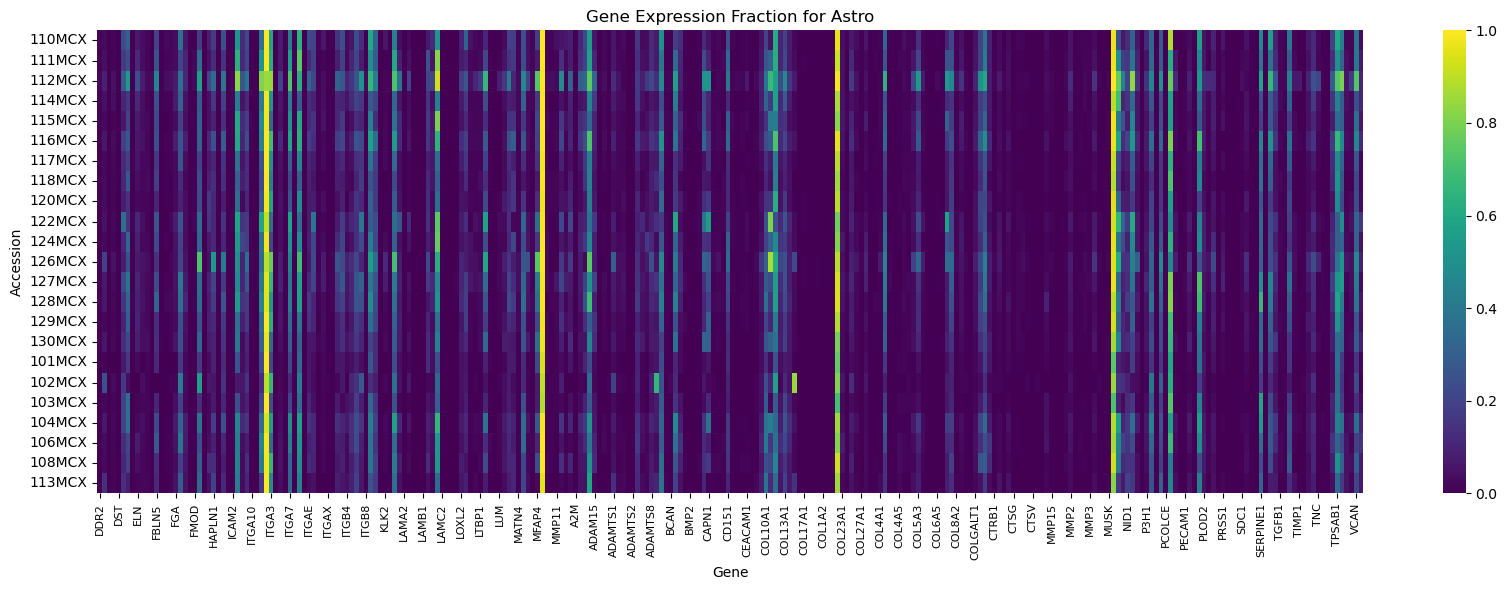

<module 'matplotlib.pyplot' from '/home/lijia/zhangjiaxuan/.conda/envs/BPCells/lib/python3.9/site-packages/matplotlib/pyplot.py'>

In [272]:
fraction_per_disease(als_df, goi, celltype_of_interest='Astro')

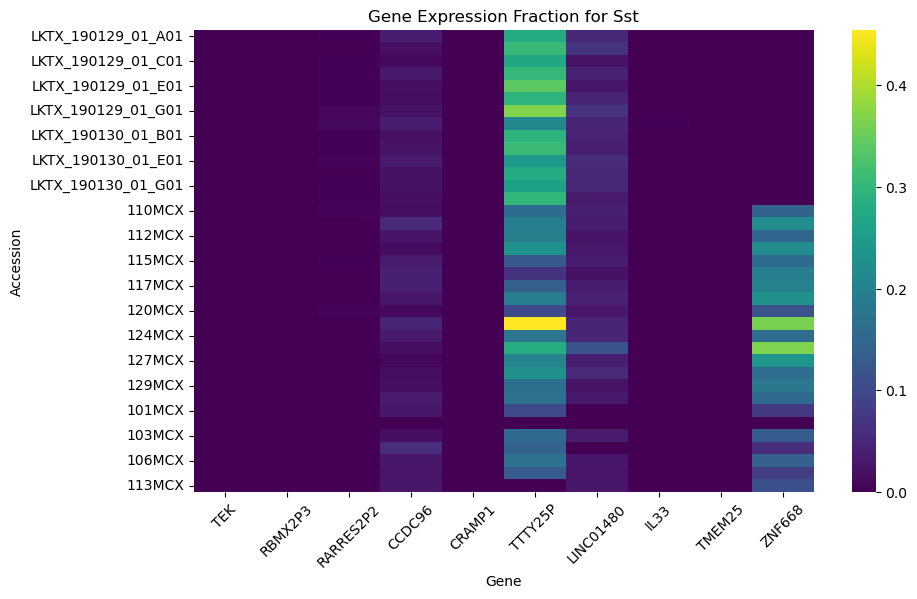

In [69]:
# Define the celltype of interest
celltype_of_interest = celltypes[0]  # replace with your actual celltype

# Filter the DataFrame for the celltype of interest
df_celltype = combined_df.xs(celltype_of_interest, level='celltype')
# Filter the DataFrame for the gene columns
df_celltype = df_celltype[selected_genes].apply(pd.to_numeric, errors='coerce').fillna(0)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.heatmap(df_celltype, cmap='viridis')
plt.xlabel('Gene')
plt.ylabel('Accession')
plt.title(f'Gene Expression Fraction for {celltype_of_interest}')
# subtitle = (
#     f"Total {sample_names[0]} Sample Number: {all_sample_table[0]}\n"
#     f"Total {sample_names[0]} Sample Number Pass Cutoff: {sample_table[0]}\n"
#     f"Total {sample_names[1]} Sample Number: {all_sample_table[1]}\n"
#     f"Total {sample_names[1]} Sample Number Pass Cutoff: {sample_table[1]}\n"
#     f"Total Cell Counts: {frac_table['cell_counts'].nunique()}\n"
#     f"Pass Cutoff Cell Counts: {round(sum(cur_frac['cell_counts'] * cur_frac['expressed_ratio']))}\n"
#     f"Expression Cutoff: {threshold}\n"
#     f"Minimum Cell Number: {floor}"
# )
 # Align the title to the left
# plt.text(x=0, y=1.5, s=subtitle, ha='left', va='top', transform=plt.gca().transAxes)  # Add the subtitle using plt.text()
plt.xticks(rotation=45)

plt.show()

In [86]:
goi_path = '/home/lijia/zhangjiaxuan/ALS/ECM_genes.txt'

with open(goi_path, 'r') as f:
    goi = [line.strip() for line in f]
goi

['DDR2',
 'DMD',
 'DMP1',
 'DSPP',
 'DST',
 'EFEMP1',
 'EFEMP2',
 'ELANE',
 'ELN',
 'F11R',
 'FBLN1',
 'FBLN2',
 'FBLN5',
 'FBN1',
 'FBN2',
 'FBN3',
 'FGA',
 'FGB',
 'FGF2',
 'FGG',
 'FMOD',
 'FN1',
 'FURIN',
 'GDF5',
 'HAPLN1',
 'HSPG2',
 'IBSP',
 'ICAM1',
 'ICAM2',
 'ICAM3',
 'ICAM4',
 'ITGA1',
 'ITGA10',
 'ITGA11',
 'ITGA2',
 'ITGA2B',
 'ITGA3',
 'ITGA4',
 'ITGA5',
 'ITGA6',
 'ITGA7',
 'ITGA8',
 'ITGA9',
 'ITGAD',
 'ITGAE',
 'ITGAL',
 'ITGAM',
 'ITGAV',
 'ITGAX',
 'ITGB1',
 'ITGB2',
 'ITGB3',
 'ITGB4',
 'ITGB5',
 'ITGB6',
 'ITGB7',
 'ITGB8',
 'JAM2',
 'JAM3',
 'KDR',
 'KLK2',
 'KLK7',
 'KLKB1',
 'LAMA1',
 'LAMA2',
 'LAMA3',
 'LAMA4',
 'LAMA5',
 'LAMB1',
 'LAMB2',
 'LAMB3',
 'LAMC1',
 'LAMC2',
 'LAMC3',
 'LOX',
 'LOXL1',
 'LOXL2',
 'LOXL3',
 'LOXL4',
 'LRP4',
 'LTBP1',
 'LTBP2',
 'LTBP3',
 'LTBP4',
 'LUM',
 'MADCAM1',
 'MATN1',
 'MATN3',
 'MATN4',
 'MFAP1',
 'MFAP2',
 'MFAP3',
 'MFAP4',
 'MFAP5',
 'MMP1',
 'MMP10',
 'MMP11',
 'MMP12',
 'MMP13',
 'MMP14',
 'A2M',
 'ACAN',
 'ACTN1',
 '

In [28]:
pivot_table['expressed_ratio'].describe()


count    2.337700e+06
mean     4.120831e-03
std      5.635352e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.095333e+02
Name: expressed_ratio, dtype: float64

In [31]:
frac_table.groupby(['celltype', 'gene']).expressed_ratio.describe()

count      mean       std  min  25%  50%  75%   
celltype gene                                                         
Astro    CCDC96     13867.0  0.015437  1.779766  0.0  0.0  0.0  0.0  \
         CRAMP1     13867.0  0.015437  1.779766  0.0  0.0  0.0  0.0   
         IL33       13867.0  0.015437  1.779766  0.0  0.0  0.0  0.0   
         LINC01480  13867.0  0.015437  1.779766  0.0  0.0  0.0  0.0   
         RARRES2P2  13867.0  0.015437  1.779766  0.0  0.0  0.0  0.0   
...                     ...       ...       ...  ...  ...  ...  ...   
Vip      RBMX2P3     9073.0  0.004986  0.152439  0.0  0.0  0.0  0.0   
         TEK         9073.0  0.004986  0.152439  0.0  0.0  0.0  0.0   
         TMEM25      9073.0  0.004986  0.152439  0.0  0.0  0.0  0.0   
         TTTY25P     9073.0  0.004986  0.152439  0.0  0.0  0.0  0.0   
         ZNF668      9073.0  0.004986  0.152439  0.0  0.0  0.0  0.0   

                           max  
celltype gene                   
Astro    CCDC96     209.533333  
         CRAMP1     209.533333  
         IL33       209.533333  
         LINC01480  209.533333  
         RARRES2P2  209.533333  
...                        ...  
Vip      RBMX2P3     11.928058  
         TEK         11.928058  
         TMEM25      11.928058  
         TTTY25P     11.928058  
         ZNF668      11.928058  

[200 rows x 8 columns]

In [32]:
frac_table = pivot_table
agg_df = frac_table.groupby(['celltype', 'gene']).expressed_ratio.mean().reset_index()

# Pivot the aggregated data
pivot_df = agg_df.pivot(index='celltype', columns='gene', values='expressed_ratio')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, cmap='viridis')
plt.title('Heatmap of Expressed Ratio')
plt.show()
plt.savefig(f'global_FractionPlot.png', bbox_inches='tight')

KeyError: 'celltype'

In [ ]:
ct_accession_flag = 'accession'
if ct_accession_flag == 'accession':
    

In [97]:
idx_bool = pd.Series(acc_table.index.isin(frac_meta['idx']), index=acc_table.index)
acc_table = acc_table[idx_bool]

In [122]:
import pandas as pd
import numpy as np

# Assuming 'adata' is your AnnData object and 'goi' is your list of genes of interest
df = adata[:, goi].to_df()
df['accession'] = adata.obs['accession']
df['param'] = adata.obs['param']

# Create a DataFrame for 'acc_table'
acc_table = df.groupby(['accession', 'param']).size().reset_index(name='Freq')
acc_table['idx'] = acc_table['param'].astype(str) + acc_table['accession'].astype(str)
acc_table = acc_table[acc_table['Freq'] > 0]
print(acc_table)

frac_meta = pd.DataFrame()
frac_meta['idx'] = df['param'].astype(str) + df['accession'].astype(str)
# Merge frac_meta and acc_table on 'idx'
frac_meta = pd.merge(frac_meta, acc_table, how='left', left_on='idx', right_on='idx')

# Fill NaN values with 0
frac_meta['Freq'] = frac_meta['Freq'].fillna(0)

# Rename 'Freq' to 'cell_counts'
frac_meta.rename(columns={'Freq': 'cell_counts'}, inplace=True)

cluster_frac = []
# Every gene expressed counts
for i in range(len(goi)):
    # current gene cluster-wise expression
    tmp = df.iloc[:, i]
    exp_cells = df[tmp >= threshold]
    
    # Create a DataFrame for 'exp_table'
    exp_table = exp_cells.groupby(['accession', 'param']).size().reset_index(name='Freq')
    exp_table = exp_table[exp_table['Freq'] > 0]
    
    goi_frac = frac_meta.copy()
    goi_frac['gene'] = goi[i]
    goi_frac['expressed_counts'] = 0
    goi_frac.loc[exp_table.index, 'expressed_counts'] = exp_table['Freq'].values
    goi_frac['expressed_ratio'] = goi_frac['expressed_counts'] / goi_frac['cell_counts']
    cluster_frac.append(goi_frac)

frac_table = pd.concat(cluster_frac)
frac_table.drop(columns=['idx'], inplace=True)


          accession   param   Freq                     idx
1  CTX-HPF_smartseq  Normal  73363  NormalCTX-HPF_smartseq
3        GSM5396155  Normal   4718        NormalGSM5396155
5        GSM5396156  Normal   3509        NormalGSM5396156
6        GSM5396157     ALS   2117           ALSGSM5396157
8        GSM5396158     ALS   5128           ALSGSM5396158


In [151]:
# clean_meta = refine_metanames(adata.obs)
# adata.obs = clean_meta
frac_table = fraction_param_table(adata, threshold=0.5, param='celltype', goi=['Ddr2'])

In [152]:
frac_table

disease         accession        param  cell_counts  gene   
0      Normal        GSM5396155           CR          156  Ddr2  \
1      Normal        GSM5396155     CA1-ProS          541  Ddr2   
2      Normal        GSM5396155           CR          156  Ddr2   
3      Normal        GSM5396155           CR          156  Ddr2   
4      Normal        GSM5396155     CA1-ProS          541  Ddr2   
...       ...               ...          ...          ...   ...   
88830  Normal  CTX-HPF_smartseq    L5 IT CTX         3580  Ddr2   
88831  Normal  CTX-HPF_smartseq        Lamp5         4800  Ddr2   
88832  Normal  CTX-HPF_smartseq        Pvalb         4081  Ddr2   
88833  Normal  CTX-HPF_smartseq  L4/5 IT CTX        11012  Ddr2   
88834  Normal  CTX-HPF_smartseq  L2/3 IT CTX         6036  Ddr2   

       expressed_counts     celltype  expressed_ratio  
0                    77           CR         0.493590  
1                     1     CA1-ProS         0.001848  
2                     0           CR         0.000000  
3                     1           CR         0.006410  
4                     1     CA1-ProS         0.001848  
...                 ...          ...              ...  
88830                 0    L5 IT CTX         0.000000  
88831                 0        Lamp5         0.000000  
88832                 0        Pvalb         0.000000  
88833                 0  L4/5 IT CTX         0.000000  
88834                 0  L2/3 IT CTX         0.000000  

[88835 rows x 8 columns]

/home/zhang_jiaxuan/conda/envs/BPCells/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 41.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zhang_jiaxuan/conda/envs/BPCells/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zhang_jiaxuan/conda/envs/BPCells/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 30.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zhang_jiaxuan/conda/envs/BPCells/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 23.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/zh

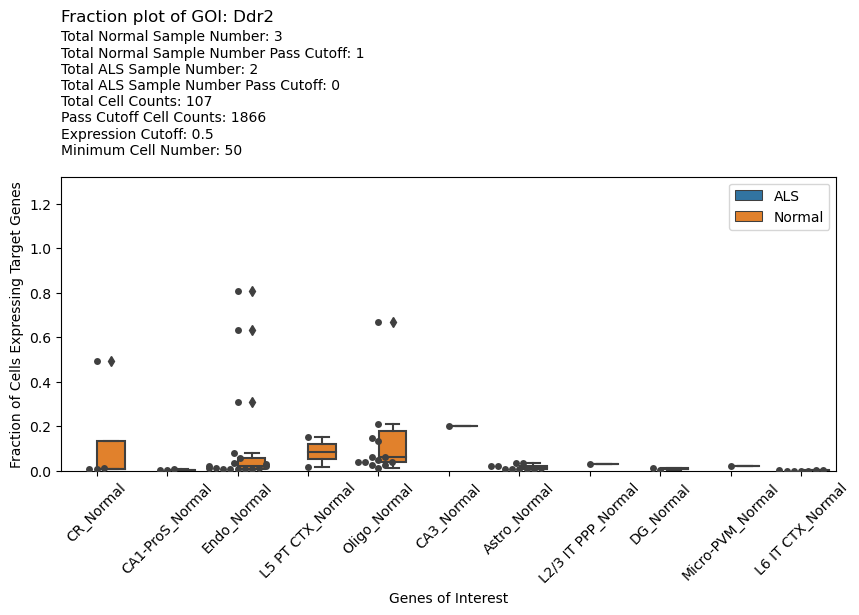

In [182]:
ps = fraction_plot(frac_table, goi=['Ddr2'], threshold=0.5, param='disease', floor=50)

In [184]:
for fig in ps:
    fig.show()

TypeError: 'NoneType' object is not iterable

In [6]:
import numpy as np

# Number of genes you want to select
num_genes = 10

# Filter the gene list to only include genes that start with a letter
gene_list = [gene for gene in adata.var_names if gene[0].isalpha()]

# Randomly select genes
selected_genes = np.random.choice(gene_list, size=num_genes, replace=False)

print(selected_genes)


['Dmrtc1c2' 'Gm17608' 'Lhcgr' 'Gtf2f1' 'Tgs1' 'Card6' 'Vps52' 'Krt27'
 'Ubald2' 'Gm8401']


In [11]:
clean_meta = refine_metanames(adata.obs)

# Check if 'accession' and 'experiment' exist in clean_meta
try:
    assert 'accession' in clean_meta.columns, "'accession' not found in clean_meta columns"
    assert 'experiment' in clean_meta.columns, "'experiment' not found in clean_meta columns"
    assert 'celltype' in clean_meta.columns, "'celltype' not found in clean_meta columns"
    assert 'disease' in clean_meta.columns, "'disease' not found in clean_meta columns"
except AssertionError as e:
    print(e)

clean_meta

accession  nCount_RNA  nFeature_RNA  percent.mt   
CTGGCTTCTGAG_1             GSM5396155    228694.0         12784         0.0  \
ACTCAACCCTCT_1             GSM5396155    208835.0         12307         0.0   
GTCTCTACACTA_1             GSM5396155    166289.0         11297         0.0   
GCCCGCTTGTTC_1             GSM5396155    152179.0         11291         0.0   
AAAATGGTCTCA_1             GSM5396155     90632.0         10199         0.0   
...                               ...         ...           ...         ...   
SM-J39VT_S475_E1-50  CTX-HPF_smartseq    534921.0         10163         0.0   
SM-J39VT_S476_E1-50  CTX-HPF_smartseq    512133.0          9207         0.0   
SM-J39VT_S478_E1-50  CTX-HPF_smartseq    390875.0          8466         0.0   
SM-J39VT_S479_E1-50  CTX-HPF_smartseq    476013.0         10218         0.0   
SM-J39VT_S480_E1-50  CTX-HPF_smartseq    513642.0          9388         0.0   

                     log10GenesPerUMI  experiment disease     tissue   
CTGGCTTCTGAG_1               0.766276   GSE178693  Normal  Brainstem  \
ACTCAACCCTCT_1               0.768854   GSE178693  Normal  Brainstem   
GTCTCTACACTA_1               0.776301   GSE178693  Normal  Brainstem   
GCCCGCTTGTTC_1               0.782025   GSE178693  Normal  Brainstem   
AAAATGGTCTCA_1               0.808620   GSE178693  Normal  Brainstem   
...                               ...         ...     ...        ...   
SM-J39VT_S475_E1-50          0.699515  AllenBrain  Normal         NA   
SM-J39VT_S476_E1-50          0.694316  AllenBrain  Normal         NA   
SM-J39VT_S478_E1-50          0.702370  AllenBrain  Normal         NA   
SM-J39VT_S479_E1-50          0.706170  AllenBrain  Normal         NA   
SM-J39VT_S480_E1-50          0.695642  AllenBrain  Normal         NA   

                    RNA_snn_res.0.2 seurat_clusters  ...   
CTGGCTTCTGAG_1                    7               7  ...  \
ACTCAACCCTCT_1                    7               7  ...   
GTCTCTACACTA_1                    7               7  ...   
GCCCGCTTGTTC_1                    7               7  ...   
AAAATGGTCTCA_1                    7               7  ...   
...                             ...             ...  ...   
SM-J39VT_S475_E1-50              NA              NA  ...   
SM-J39VT_S476_E1-50              NA              NA  ...   
SM-J39VT_S478_E1-50              NA              NA  ...   
SM-J39VT_S479_E1-50              NA              NA  ...   
SM-J39VT_S480_E1-50              NA              NA  ...   

                    cell_set_alt_alias_id cell_set_alt_alias_label   
CTGGCTTCTGAG_1                -2147483648                     True  \
ACTCAACCCTCT_1                -2147483648                     True   
GTCTCTACACTA_1                -2147483648                     True   
GCCCGCTTGTTC_1                -2147483648                     True   
AAAATGGTCTCA_1                -2147483648                     True   
...                                   ...                      ...   
SM-J39VT_S475_E1-50                   201                     True   
SM-J39VT_S476_E1-50                    15                     True   
SM-J39VT_S478_E1-50                   123                     True   
SM-J39VT_S479_E1-50                   182                     True   
SM-J39VT_S480_E1-50                   168                     True   

                    cell_set_designation_color cell_set_designation_id   
CTGGCTTCTGAG_1                              NA             -2147483648  \
ACTCAACCCTCT_1                              NA             -2147483648   
GTCTCTACACTA_1                              NA             -2147483648   
GCCCGCTTGTTC_1                              NA             -2147483648   
AAAATGGTCTCA_1                              NA             -2147483648   
...                                        ...                     ...   
SM-J39VT_S475_E1-50                    #61867A                     201   
SM-J39VT_S476_E1-50                    #A6666F              

In [12]:
adata.obs = clean_meta

In [21]:
import numpy as np
import re

# Number of genes you want to select
num_genes = 10


# Filter out gene names that contain "\\." or start with "LOC"
gene_list = [gene for gene in adata.var_names if gene[0].isalpha() and not gene.islower() and not re.search(r'\.|^LOC', gene)]

# Randomly select genes
selected_genes = np.random.choice(gene_list, size=num_genes, replace=False)
selected_genes


array(['TEK', 'RBMX2P3', 'RARRES2P2', 'CCDC96', 'CRAMP1', 'TTTY25P',
       'LINC01480', 'IL33', 'TMEM25', 'ZNF668'], dtype='<U18')

In [72]:
pivot_table

disease         accession     celltype  cell_counts     gene  Freq   
0        Normal        GSM5396155           CR          156  Gm17820   149  \
1        Normal        GSM5396155           CR          156  Gm17820   541   
2        Normal        GSM5396155           CR          156  Gm17820    20   
3        Normal        GSM5396155           CR          156  Gm17820    50   
4        Normal        GSM5396155           CR          156  Gm17820   156   
...         ...               ...          ...          ...      ...   ...   
3500106  Normal  CTX-HPF_smartseq  L2/3 IT CTX         6036  Gm35308  1554   
3500107  Normal  CTX-HPF_smartseq  L2/3 IT CTX         6036  Gm35308  5556   
3500108  Normal  CTX-HPF_smartseq  L2/3 IT CTX         6036  Gm35308   281   
3500109  Normal  CTX-HPF_smartseq  L2/3 IT CTX         6036  Gm35308   120   
3500110  Normal  CTX-HPF_smartseq  L2/3 IT CTX         6036  Gm35308  6327   

         expressed_ratio  
0               0.955128  
1               3.467949  
2               0.128205  
3               0.320513  
4               1.000000  
...                  ...  
3500106         0.257455  
3500107         0.920477  
3500108         0.046554  
3500109         0.019881  
3500110         1.048211  

[35001110 rows x 7 columns]

In [74]:
# First, let's create a copy of your DataFrame and drop the 'cell_counts' and 'Freq' columns as they won't be needed in the pivoted DataFrame
df = pivot_table.copy().drop(columns=['cell_counts', 'Freq'])

# Now we pivot the DataFrame
pivoted_df = df.pivot_table(index=['disease', 'accession', 'celltype'], columns='gene', values='expressed_ratio')

# Reset the index to make 'disease', 'accession', and 'celltype' back into columns
pivoted_df.reset_index(inplace=True)


In [75]:
pivoted_df

gene disease   accession   celltype       Exoc4     Gm17820     Gm18184   
0        ALS  GSM5396157      Astro    0.935897    0.935897    0.935897  \
1        ALS  GSM5396157   CA1-ProS    0.457433    0.457433    0.457433   
2        ALS  GSM5396157  CA2-IG-FC    7.402098    7.402098    7.402098   
3        ALS  GSM5396157        CA3    5.815934    5.815934    5.815934   
4        ALS  GSM5396157         CR    0.904701    0.904701    0.904701   
..       ...         ...        ...         ...         ...         ...   
144   Normal  GSM5396156  Micro-PVM    7.387368    7.387368    7.387368   
145   Normal  GSM5396156      Oligo    7.018000    7.018000    7.018000   
146   Normal  GSM5396156      Pvalb  140.360000  140.360000  140.360000   
147   Normal  GSM5396156        Sst   14.036000   14.036000   14.036000   
148   Normal  GSM5396156       VLMC  140.360000  140.360000  140.360000   

gene     Gm35308        Lcn4    Olfr1032     Olfr768      Pgm2l1     Tmem39a   
0       0.935897    0.935897    0.935897    0.935897    0.935897    0.935897  \
1       0.457433    0.457433    0.457433    0.457433    0.457433    0.457433   
2       7.402098    7.402098    7.402098    7.402098    7.402098    7.402098   
3       5.815934    5.815934    5.815934    5.815934    5.815934    5.815934   
4       0.904701    0.904701    0.904701    0.904701    0.904701    0.904701   
..           ...         ...         ...         ...         ...         ...   
144     7.387368    7.387368    7.387368    7.387368    7.387368    7.387368   
145     7.018000    7.018000    7.018000    7.018000    7.018000    7.018000   
146   140.360000  140.360000  140.360000  140.360000  140.360000  140.360000   
147    14.036000   14.036000   14.036000   14.036000   14.036000   14.036000   
148   140.360000  140.360000  140.360000  140.360000  140.360000  140.360000   

gene       Wisp1  
0       0.935897  
1       0.457433  
2       7.402098  
3       5.815934  
4       0.904701  
..           ...  
144     7.387368  
145     7.018000  
146   140.360000  
147    14.036000  
148   140.360000  

[149 rows x 13 columns]

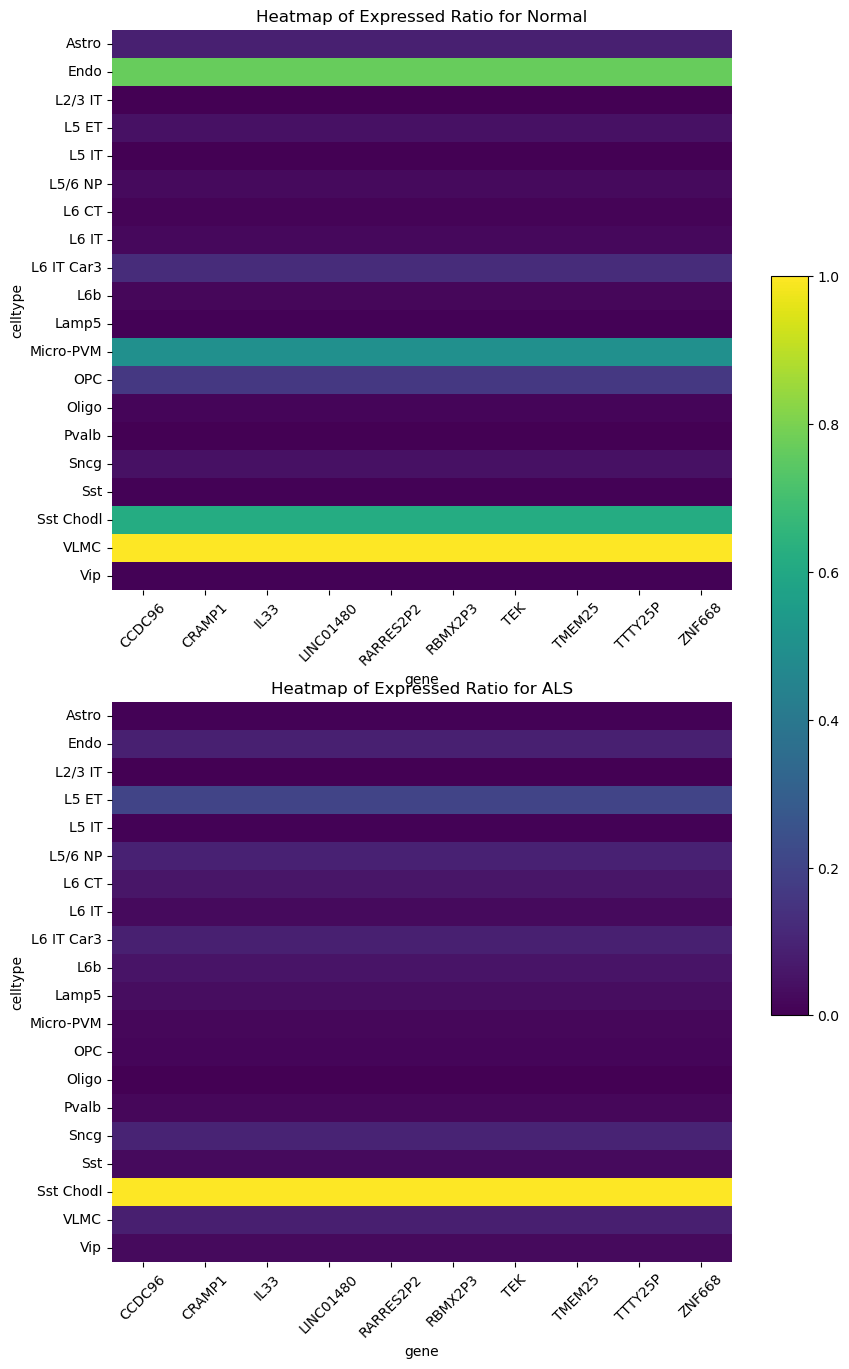

In [22]:
pivot_table = fraction_param_table(adata, threshold=0, param='celltype', goi=selected_genes)

# Get the unique disease conditions
diseases = pivot_table['disease'].unique()

# Create a figure with a subplot for each disease condition
fig, axs = plt.subplots(len(diseases), figsize=(10, 8*len(diseases)))

# # Find the min and max expressed_ratio across all diseases
# vmin = np.percentile(pivot_table['expressed_ratio'], 0)
# vmax = np.percentile(pivot_table['expressed_ratio'], 99)
# print(vmin, vmax)
for i, disease in enumerate(diseases):
    # Filter the data for the current disease condition
    df_disease = pivot_table[pivot_table['disease'] == disease]
    
    # Aggregate the data
    agg_df = df_disease.groupby(['celltype', 'gene']).expressed_ratio.mean().reset_index()
    
    # Pivot the aggregated data
    pivot_df = agg_df.pivot(index='celltype', columns='gene', values='expressed_ratio')
    
    # Create the heatmap in the current subplot
    sns.heatmap(pivot_df, cmap='viridis', ax=axs[i], cbar=False)
    # Rotate the x-axis labels
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45)
    axs[i].set_title(f'Heatmap of Expressed Ratio for {disease}')

# Create a single colorbar for all subplots
# norm = plt.Normalize(vmin, vmax)
sm = plt.cm.ScalarMappable(cmap='viridis')
sm.set_array([])
fig.colorbar(sm, ax=axs, orientation='vertical', shrink=0.6)

# plt.tight_layout()
plt.show()
